# BLM example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Add PyTwoWay to system path (SET THESE TO WHERE YOU HAVE THE PACKAGE REPOSITORIES CLONED)
import sys
sys.path.append('../../..')

In [3]:
# Import the PyTwoWay package 
# (Make sure you have installed it using pip install pytwoway)
import numpy as np
import bipartitepandas as bpd
import pytwoway as tw
from matplotlib import pyplot as plt

## First, check out parameter options

In [4]:
print('----- BLM -----')
tw.blm_params().describe_all()
print('----- Clustering -----')
bpd.cluster_params().describe_all()
print('----- Cleaning -----')
bpd.clean_params().describe_all()
print('----- Simulation -----')
bpd.sim_params().describe_all()

----- BLM -----
KEY: 'nl'
CURRENT VALUE: 6
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=6) Number of worker types.
        
KEY: 'nk'
CURRENT VALUE: 10
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10) Number of firm types.
        
KEY: 'custom_independent_dict'
CURRENT VALUE: None
VALID VALUES: None or one of type <class 'dict'>
DESCRIPTION: 
            (default=None) Dictionary of custom general column names (to use as controls) linked to the number of types for that column, where the estimated parameters should be independent of worker/firm type pairs. In other words, any column listed as a member of this parameter will have the same parameter estimated for each worker-firm type pair (the parameter value can still differ over time). None is equivalent to {}.
        
KEY: 'custom_dependent_dict'
CURRENT VALUE: None
VALID VALUES: None or one of type <class 'dict'>
DESCRIPTION: 
      

## Second, set parameter choices

In [5]:
nl = 2 # Number of worker types
nk = 3 # Number of firm types
blm_params = tw.blm_params({'nl': nl, 'nk': nk, 'fixb': False, 'stationary': False, 'n_iters_movers': 100, 'threshold_movers': 1e-7, 'd_prior': 1.0001, 'verbose': 0, 'custom_independent_dict': {'l': nl}, 'verbose': 2})
cluster_params = bpd.cluster_params({'measures': bpd.measures.CDFs(), 'grouping': bpd.grouping.KMeans(n_clusters=nk), 'is_sorted': True, 'copy': False})
clean_params = bpd.clean_params({'drop_returns': 'returners', 'copy': False})
sim_params = bpd.sim_params({'nl': nl, 'nk': nk, 'c_sort': 0, 'c_netw': 0, 'c_sig': 1})

## Simulate data

Simulate a bipartite network using BipartitePandas. We use this here to demonstrate how to fit the estimator using real data.

In [120]:
sim_data = bpd.BipartiteDataFrame(bpd.SimBipartite(sim_params).simulate()[['i', 'j', 'y', 't', 'l', 'alpha', 'k', 'psi']]).clean(clean_params).collapse(is_sorted=True, copy=False).to_eventstudy(is_sorted=True, copy=False) #.cluster(cluster_params).collapse(is_sorted=True, copy=False).to_eventstudy(is_sorted=True, copy=False)
sim_data[['g1', 'g2']] = sim_data[['k1', 'k2']]
print('Movers data')
display(sim_data[sim_data['m'] > 0])
print('Stayers data')
display(sim_data[sim_data['m'] == 0])

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how='returners')
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index
Movers data


,i,j1,j2,y1,y2,t11,t12,t21,t22,w1,...,alpha1,alpha2,k1,k2,l1,l2,psi1,psi2,g1,g2
0,0,49,92,1.123671,0.902455,0,2,3,4,3,...,0.430727,0.430727,0.0,1.0,1.0,1.0,-0.67449,0.00000,0.0,1.0
1,1,67,120,1.081325,1.644328,0,0,1,1,1,...,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000,1.0,1.0
2,1,120,0,1.644328,-1.474984,1,1,2,2,1,...,0.430727,0.430727,1.0,0.0,1.0,1.0,0.00000,-0.67449,1.0,0.0
3,1,0,191,-1.474984,-0.592552,2,2,3,3,1,...,0.430727,0.430727,0.0,2.0,1.0,1.0,-0.67449,0.67449,0.0,2.0
4,1,191,12,-0.592552,-0.569905,3,3,4,4,1,...,0.430727,0.430727,2.0,0.0,1.0,1.0,0.67449,-0.67449,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20271,9920,182,181,-0.655211,-1.024043,2,3,4,4,2,...,-0.430727,-0.430727,2.0,2.0,0.0,0.0,0.67449,0.67449,2.0,2.0
20272,9921,181,12,0.462585,-0.274457,0,2,3,4,3,...,0.430727,0.430727,2.0,0.0,1.0,1.0,0.67449,-0.67449,2.0,0.0
20273,9922,96,165,-1.097885,0.777581,0,1,2,2,2,...,-0.430727,-0.430727,1.0,2.0,0.0,0.0,0.00000,0.67449,1.0,2.0
20274,9922,165,132,0.777581,-0.107130,2,2,3,3,1,...,-0.430727,-0.430727,2.0,1.0,0.0,0.0,0.67449,0.00000,2.0,1.0


Stayers data


,i,j1,j2,y1,y2,t11,t12,t21,t22,w1,...,alpha1,alpha2,k1,k2,l1,l2,psi1,psi2,g1,g2
69,33,128,128,-0.469676,-0.469676,0,4,0,4,5,...,-0.430727,-0.430727,1.0,1.0,0.0,0.0,0.00000,0.00000,1.0,1.0
112,52,126,126,-0.362432,-0.362432,0,4,0,4,5,...,-0.430727,-0.430727,1.0,1.0,0.0,0.0,0.00000,0.00000,1.0,1.0
118,55,130,130,-0.384246,-0.384246,0,4,0,4,5,...,-0.430727,-0.430727,1.0,1.0,0.0,0.0,0.00000,0.00000,1.0,1.0
152,72,26,26,-1.080440,-1.080440,0,4,0,4,5,...,-0.430727,-0.430727,0.0,0.0,0.0,0.0,-0.67449,-0.67449,0.0,0.0
171,82,160,160,1.054364,1.054364,0,4,0,4,5,...,0.430727,0.430727,2.0,2.0,1.0,1.0,0.67449,0.67449,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20072,9822,148,148,-0.250110,-0.250110,0,4,0,4,5,...,-0.430727,-0.430727,2.0,2.0,0.0,0.0,0.67449,0.67449,2.0,2.0
20134,9852,186,186,0.289116,0.289116,0,4,0,4,5,...,-0.430727,-0.430727,2.0,2.0,0.0,0.0,0.67449,0.67449,2.0,2.0
20169,9870,92,92,-0.228025,-0.228025,0,4,0,4,5,...,-0.430727,-0.430727,1.0,1.0,0.0,0.0,0.00000,0.00000,1.0,1.0
20181,9877,14,14,-1.400647,-1.400647,0,4,0,4,5,...,-0.430727,-0.430727,0.0,0.0,0.0,0.0,-0.67449,-0.67449,0.0,0.0


## Initialize and run BLMEstimator

In [121]:
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(blm_params)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data[sim_data['m'] > 0], sdata=sim_data[sim_data['m'] == 0], n_init=40, n_best=5, ncore=1)


  0%|                                                    | 0/40 [00:00<?, ?it/s]

Running fixm movers
loop 0, liks -5.686390250460535
loop 1, liks -4.074890648535017
loop 2, liks -4.074417061833412
loop 3, liks -4.0740470639181705
loop 4, liks -4.073701260026179
loop 5, liks -4.0733670636641035
loop 6, liks -4.073040200660574
loop 7, liks -4.072718517890802
loop 8, liks -4.0724008278440795
loop 9, liks -4.07208646978565
loop 10, liks -4.071775078573485
loop 11, liks -4.071466454017232
loop 12, liks -4.071160486715724
loop 13, liks -4.070857116288095
loop 14, liks -4.070556308099619
loop 15, liks -4.070258040469593
loop 16, liks -4.069962297784451
loop 17, liks -4.069669066923258
loop 18, liks -4.0693783355348065
loop 19, liks -4.069090091345613
loop 20, liks -4.068804322037739
loop 21, liks -4.068521015436504
loop 22, liks -4.068240159860546
loop 23, liks -4.067961744549454
loop 24, liks -4.067685760119356
loop 25, liks -4.067412199016711
loop 26, liks -4.06714105595174
loop 27, liks -4.06687232829959
loop 28, liks -4.066606016461163
loop 29, liks -4.066342124177980

loop 52, liks -2.7718246719048136
loop 53, liks -2.771805940801137
loop 54, liks -2.771787663349038
loop 55, liks -2.771769827947674
loop 56, liks -2.7717524233208697
loop 57, liks -2.77173543850677
loop 58, liks -2.771718862847883
loop 59, liks -2.7717026859814924
loop 60, liks -2.771686897830434
loop 61, liks -2.7716714885942033
loop 62, liks -2.7716564487403907
loop 63, liks -2.7716417689964286
loop 64, liks -2.771627440341623
loop 65, liks -2.7716134539994846
loop 66, liks -2.771599801430312
loop 67, liks -2.7715864743240517
loop 68, liks -2.771573464593394
loop 69, liks -2.7715607643671114
loop 70, liks -2.771548365983628
loop 71, liks -2.7715362619848047
loop 72, liks -2.7715244451099372
loop 73, liks -2.7715129082899557
loop 74, liks -2.771501644641818
loop 75, liks -2.7714906474630925
loop 76, liks -2.7714799102267165
loop 77, liks -2.7714694265759325
loop 78, liks -2.7714591903193844
loop 79, liks -2.77144919542638
loop 80, liks -2.7714394360223045
loop 81, liks -2.77142990638


  2%|█                                           | 1/40 [00:03<02:24,  3.70s/it]

loop 87, liks -2.7713772512058696
loop 88, liks -2.7713691815551935
loop 89, liks -2.7713613008578073
loop 90, liks -2.771353604577672
loop 91, liks -2.771346088293052
loop 92, liks -2.771338747693399
loop 93, liks -2.771331578576317
loop 94, liks -2.7713245768446297
loop 95, liks -2.7713177385035332
loop 96, liks -2.771311059657832
loop 97, liks -2.771304536509264
loop 98, liks -2.7712981653538997
loop 99, liks -2.771291942579625
Running fixm movers
loop 0, liks -3.8377032386219567
loop 1, liks -3.1186145107218186
loop 2, liks -3.0717667540777382
loop 3, liks -3.06197969932314
loop 4, liks -3.0586071049491976
loop 5, liks -3.057021033927477
loop 6, liks -3.056147754102882
loop 7, liks -3.055621544609902
loop 8, liks -3.0552843627442545
loop 9, liks -3.0550581448329317
loop 10, liks -3.0549008012351555
loop 11, liks -3.0547881084962767
loop 12, liks -3.054705394337006
loop 13, liks -3.0546434003601846
loop 14, liks -3.054596085813887
loop 15, liks -3.0545593975230494
loop 16, liks -3.0

loop 84, liks -2.771596305360593
loop 85, liks -2.7715825185317637
loop 86, liks -2.77156907663409
loop 87, liks -2.77155597065806
loop 88, liks -2.771543191843368
loop 89, liks -2.771530731671546
loop 90, liks -2.77151858185881
loop 91, liks -2.771506734349146
loop 92, liks -2.771495181307611
loop 93, liks -2.7714839151138473
loop 94, liks -2.771472928355799
loop 95, liks -2.771462213823631
loop 96, liks -2.7714517645038304
loop 97, liks -2.771441573573504
loop 98, liks -2.771431634394845



  5%|██▏                                         | 2/40 [00:07<02:14,  3.53s/it]

loop 99, liks -2.771421940509773
Running fixm movers
loop 0, liks -4.09232012567551
loop 1, liks -3.487412957762944
loop 2, liks -3.4677816715307617
loop 3, liks -3.451004972312539
loop 4, liks -3.4357205179082713
loop 5, liks -3.4217070291702534
loop 6, liks -3.4090399551488995
loop 7, liks -3.3978487887177367
loop 8, liks -3.38820836387988
loop 9, liks -3.3801008107184134
loop 10, liks -3.3734226281493958
loop 11, liks -3.368013350949525
loop 12, liks -3.363687467508968
loop 13, liks -3.360259571265828
loop 14, liks -3.3575599412899755
loop 15, liks -3.3554418406886652
loop 16, liks -3.3537831677881385
loop 17, liks -3.352484914301345
loop 18, liks -3.351468183414154
loop 19, liks -3.3506708276856054
loop 20, liks -3.3500442591448643
loop 21, liks -3.34955066763939
loop 22, liks -3.349160708770994
loop 23, liks -3.3488516374827175
loop 24, liks -3.348605828848935
loop 25, liks -3.3484096193666333
loop 26, liks -3.3482524059719476
loop 27, liks -3.348125948618002
loop 28, liks -3.3480

loop 55, liks -2.774936352861561
loop 56, liks -2.774835372032995
loop 57, liks -2.7747372246969966
loop 58, liks -2.7746418248554225
loop 59, liks -2.7745490889800655
loop 60, liks -2.774458935980803
loop 61, liks -2.774371287176481
loop 62, liks -2.774286066265103
loop 63, liks -2.774203199291165
loop 64, liks -2.7741226146088978
loop 65, liks -2.774044242840944
loop 66, liks -2.7739680168324923
loop 67, liks -2.773893871601253
loop 68, liks -2.7738217442838646
loop 69, liks -2.7737515740794203
loop 70, liks -2.773683302190847
loop 71, liks -2.7736168717648333
loop 72, liks -2.773552227830957
loop 73, liks -2.7734893172405846
loop 74, liks -2.7734280886060523
loop 75, liks -2.7733684922405093
loop 76, liks -2.7733104800987918
loop 77, liks -2.7732540057195605
loop 78, liks -2.773199024168922
loop 79, liks -2.7731454919856575
loop 80, liks -2.7730933671281677
loop 81, liks -2.7730426089231854
loop 82, liks -2.7729931780162858
loop 83, liks -2.772945036324197
loop 84, liks -2.772898146


  8%|███▎                                        | 3/40 [00:11<02:22,  3.85s/it]

loop 99, liks -2.772323305581481
Running fixm movers
loop 0, liks -4.224537402887437
loop 1, liks -3.116204114631548
loop 2, liks -3.10932430087658
loop 3, liks -3.107664762314626
loop 4, liks -3.1070549871160917
loop 5, liks -3.1067896324503246
loop 6, liks -3.106659152420953
loop 7, liks -3.1065883421481613
loop 8, liks -3.106546848789366
loop 9, liks -3.1065210689974196
loop 10, liks -3.106504295458938
loop 11, liks -3.1064929425570664
loop 12, liks -3.1064849678699384
loop 13, liks -3.106479151130841
loop 14, liks -3.1064747361879474
loop 15, liks -3.106471239646581
loop 16, liks -3.1064683420352255
loop 17, liks -3.1064658223275377
loop 18, liks -3.106463515845176
loop 19, liks -3.106461284094094
loop 20, liks -3.1064589889000582
loop 21, liks -3.106456465606845
loop 22, liks -3.106453497188701
loop 23, liks -3.106449823121105
loop 24, liks -3.1064453097181715
loop 25, liks -3.106440424849733
loop 26, liks -3.106436407502905
loop 27, liks -3.1064340521322005
loop 28, liks -3.10643


 10%|████▍                                       | 4/40 [00:14<02:09,  3.60s/it]

loop 96, liks -2.7728689909918574
loop 97, liks -2.772822053600902
loop 98, liks -2.7727763769274936
loop 99, liks -2.7727319246536712
Running fixm movers
loop 0, liks -3.0842157683126867
loop 1, liks -2.986587700985395
loop 2, liks -2.9677134529685754
loop 3, liks -2.958714706961537
loop 4, liks -2.953599861174579
loop 5, liks -2.9504935359588
loop 6, liks -2.948525837517724
loop 7, liks -2.9472276603972674
loop 8, liks -2.9463350304714804
loop 9, liks -2.945696079765626
loop 10, liks -2.9452211967246837
loop 11, liks -2.9448559825225837
loop 12, liks -2.9445664765155946
loop 13, liks -2.944330917533657
loop 14, liks -2.944135017005227
loop 15, liks -2.9439691664077734
loop 16, liks -2.9438267440484474
loop 17, liks -2.943703066465672
loop 18, liks -2.9435947285114086
loop 19, liks -2.943499183144375
loop 20, liks -2.943414471433965
loop 21, liks -2.943339047543268
loop 22, liks -2.943271663975153
loop 23, liks -2.943211295081048
loop 24, liks -2.9431570849005984
loop 25, liks -2.9431

loop 42, liks -2.790349856190595
loop 43, liks -2.7903469070073177
loop 44, liks -2.7903438969112373
loop 45, liks -2.790340824076473
loop 46, liks -2.7903376865656333
loop 47, liks -2.7903344823201657
loop 48, liks -2.7903312091498154
loop 49, liks -2.790327864721103
loop 50, liks -2.7903244465447266
loop 51, liks -2.7903209519617573
loop 52, liks -2.7903173781285187
loop 53, liks -2.7903137219999867
loop 54, liks -2.7903099803115494
loop 55, liks -2.790306149558944
loop 56, liks -2.79030222597615
loop 57, liks -2.7902982055109966
loop 58, liks -2.7902940837982166
loop 59, liks -2.7902898561296188
loop 60, liks -2.790285517421024
loop 61, liks -2.7902810621755587
loop 62, liks -2.7902764844428116
loop 63, liks -2.7902717777733352
loop 64, liks -2.7902669351678395
loop 65, liks -2.7902619490203677
loop 66, liks -2.790256811054613
loop 67, liks -2.790251512252399
loop 68, liks -2.7902460427732056
loop 69, liks -2.79024039186342
loop 70, liks -2.790234547753788
loop 71, liks -2.790228497


 12%|█████▌                                      | 5/40 [00:18<02:12,  3.80s/it]

loop 87, liks -2.7900856923990642
loop 88, liks -2.7900719784400896
loop 89, liks -2.790057318045094
loop 90, liks -2.790041602686735
loop 91, liks -2.790024707909905
loop 92, liks -2.7900064906033846
loop 93, liks -2.7899867857627827
loop 94, liks -2.7899654026521095
loop 95, liks -2.7899421202595263
loop 96, liks -2.789916681933343
loop 97, liks -2.7898887890801753
loop 98, liks -2.789858093813492
loop 99, liks -2.7898241904651195
Running fixm movers
loop 0, liks -6.689808460749735
loop 1, liks -4.074553110803151
loop 2, liks -3.978864539582901
loop 3, liks -3.941064261495393
loop 4, liks -3.9246230568294367
loop 5, liks -3.917118114980609
loop 6, liks -3.9135969555707084
loop 7, liks -3.911926457001742
loop 8, liks -3.9111302305998112
loop 9, liks -3.910749669058301
loop 10, liks -3.9105674250808606
loop 11, liks -3.910480025408126
loop 12, liks -3.9104380614293737
loop 13, liks -3.9104178918479353
loop 14, liks -3.910408187921158
loop 15, liks -3.910403514635877



 15%|██████▌                                     | 6/40 [00:19<01:29,  2.63s/it]

loop 16, liks -3.910401261834748
loop 17, liks -3.910400174772302
loop 18, liks -3.91039964969373
loop 19, liks -3.910399395806786
loop 20, liks -3.910399272918189
loop 21, liks -3.9103992133729526
Running constrained movers
loop 0, liks -3.9103992133729526
loop 1, liks -2.790826446823394
loop 2, liks -2.7908264418756366
Running unconstrained movers
loop 0, liks -2.7908264418756366
loop 1, liks -2.7908264319467286
Running fixm movers
loop 0, liks -9.224064444073427
loop 1, liks -4.9973980352182386
loop 2, liks -4.977207139121696
loop 3, liks -4.972617218536019
loop 4, liks -4.969706730884179
loop 5, liks -4.9677172838653565
loop 6, liks -4.966321864263123
loop 7, liks -4.965321041131154
loop 8, liks -4.964588611348128
loop 9, liks -4.964042597806337
loop 10, liks -4.963628506954764
loop 11, liks -4.963309375336851
loop 12, liks -4.963059681236081
loop 13, liks -4.962861521298014
loop 14, liks -4.962702153153019
loop 15, liks -4.962572384109712
loop 16, liks -4.962465496373862
loop 17, 

loop 49, liks -2.7901642982042967
loop 50, liks -2.790162872769137
loop 51, liks -2.790161464367593
loop 52, liks -2.7901600730622413
loop 53, liks -2.790158698902458
loop 54, liks -2.7901573419246883
loop 55, liks -2.7901560021527323
loop 56, liks -2.7901546795980425
loop 57, liks -2.79015337426005
loop 58, liks -2.7901520861264952
loop 59, liks -2.7901508151737735
loop 60, liks -2.790149561367291
loop 61, liks -2.7901483246618395
loop 62, liks -2.79014710500196
loop 63, liks -2.7901459023223363
loop 64, liks -2.790144716548171
loop 65, liks -2.7901435475955845
loop 66, liks -2.790142395372004
loop 67, liks -2.7901412597765636
loop 68, liks -2.790140140700495
loop 69, liks -2.7901390380275264
loop 70, liks -2.790137951634277
loop 71, liks -2.7901368813906453
loop 72, liks -2.790135827160199
loop 73, liks -2.790134788800558
loop 74, liks -2.790133766163775
loop 75, liks -2.7901327590967067
loop 76, liks -2.790131767441379
loop 77, liks -2.790130791035348
loop 78, liks -2.79012982971205


 18%|███████▋                                    | 7/40 [00:22<01:40,  3.04s/it]

loop 98, liks -2.790113491011151
loop 99, liks -2.7901128039095062
Running fixm movers
loop 0, liks -3.6135813057712807
loop 1, liks -3.0622914171558104
loop 2, liks -3.057939945533376
loop 3, liks -3.0569997193042195
loop 4, liks -3.056673238661942
loop 5, liks -3.056538642682884
loop 6, liks -3.0564778567745146
loop 7, liks -3.056448861297821
loop 8, liks -3.0564345568622624
loop 9, liks -3.05642735180272
loop 10, liks -3.05642367551258
loop 11, liks -3.0564217844374797
loop 12, liks -3.056420806578963
loop 13, liks -3.0564202991853593
loop 14, liks -3.056420035283718
loop 15, liks -3.0564198977925026
loop 16, liks -3.056419826066264
Running constrained movers
loop 0, liks -3.056419826066264
loop 1, liks -2.7908264234510916
loop 2, liks -2.790826354643148
Running unconstrained movers
loop 0, liks -2.790826354643148
loop 1, liks -2.7908261188159864
loop 2, liks -2.7908246341757597
loop 3, liks -2.790789784294677
loop 4, liks -2.7904553618161665
loop 5, liks -2.790225333801777
loop 6, 


 20%|████████▊                                   | 8/40 [00:23<01:11,  2.23s/it]

loop 11, liks -2.7895292128072
loop 12, liks -2.7894738423755965
loop 13, liks -2.789326889457734
loop 14, liks -2.789254796130883
loop 15, liks -2.7892030596409696
loop 16, liks -2.7891371009825234
loop 17, liks -2.789083214786315
loop 18, liks -2.789070624154248
loop 19, liks -2.7890657310906324
loop 20, liks -2.7890652199579806
loop 21, liks -2.7890651895916703
Running fixm movers
loop 0, liks -4.715501485397317
loop 1, liks -3.296247325158056
loop 2, liks -3.2645846918427446
loop 3, liks -3.2603519284141145
loop 4, liks -3.2594072828980933
loop 5, liks -3.2591381368720445
loop 6, liks -3.259048040453498
loop 7, liks -3.2590128221460968
loop 8, liks -3.2589971166744656
loop 9, liks -3.2589893931044256
loop 10, liks -3.2589853042230486
loop 11, liks -3.2589830005521847
loop 12, liks -3.2589816261454416
loop 13, liks -3.2589807610108346
loop 14, liks -3.2589801892733083
loop 15, liks -3.2589797950880364
loop 16, liks -3.258979513519144
loop 17, liks -3.258979306506457
loop 18, liks -3


 22%|█████████▉                                  | 9/40 [00:26<01:15,  2.43s/it]

loop 95, liks -2.7723177612044663
loop 96, liks -2.772285463093884
loop 97, liks -2.7722540105720035
loop 98, liks -2.772223380135198
loop 99, liks -2.7721935489857477
Running fixm movers
loop 0, liks -3.561681361335076
loop 1, liks -3.1523601892806314
loop 2, liks -3.105554735112777
loop 3, liks -3.0897458244986145
loop 4, liks -3.0832298123121964
loop 5, liks -3.080122669819447
loop 6, liks -3.078471068077745
loop 7, liks -3.0775038424260197
loop 8, liks -3.0768849557960642
loop 9, liks -3.0764580359913127
loop 10, liks -3.07614570019774
loop 11, liks -3.0759070874581265
loop 12, liks -3.0757191015703373
loop 13, liks -3.075567762191757
loop 14, liks -3.0754440403249927
loop 15, liks -3.0753417613478216
loop 16, liks -3.0752564977755483
loop 17, liks -3.075184954192611
loop 18, liks -3.075124606953957
loop 19, liks -3.075073481568331
loop 20, liks -3.0750300079837958
loop 21, liks -3.0749929221151806
loop 22, liks -3.0749611961752406
loop 23, liks -3.0749339877939383
loop 24, liks -3

loop 83, liks -2.7716556244255366
loop 84, liks -2.7716403491459967
loop 85, liks -2.771625457833641
loop 86, liks -2.7716109403936904
loop 87, liks -2.7715967870129066
loop 88, liks -2.771582988151175
loop 89, liks -2.771569534533355
loop 90, liks -2.771556417141396
loop 91, liks -2.7715436272067056
loop 92, liks -2.7715311562027596
loop 93, liks -2.771518995837954
loop 94, liks -2.7715071380486753
loop 95, liks -2.7714955749925996
loop 96, liks -2.771484299042199
loop 97, liks -2.771473302778451



 28%|███████████▊                               | 11/40 [00:30<00:58,  2.02s/it]

loop 98, liks -2.7714625789847505
loop 99, liks -2.771452120641011
Running fixm movers
loop 0, liks -4.572087450733197
loop 1, liks -3.281138460182124
loop 2, liks -3.279893455849899
loop 3, liks -3.2798310527502306
loop 4, liks -3.2798242529384116
loop 5, liks -3.2798233328957918
loop 6, liks -3.279823200066344
loop 7, liks -3.279823180378214
Running constrained movers
loop 0, liks -3.279823180378214
loop 1, liks -2.790826451820192
loop 2, liks -2.790826448526319
Running unconstrained movers
loop 0, liks -2.790826448526319
loop 1, liks -2.790826442423252


Running fixm movers
loop 0, liks -4.514406856571748
loop 1, liks -3.836981126888642
loop 2, liks -3.8222535695248303
loop 3, liks -3.8182018869355554
loop 4, liks -3.8164351412239226
loop 5, liks -3.815595311282879
loop 6, liks -3.8151786033173996
loop 7, liks -3.8149651571769896
loop 8, liks -3.8148530958418307
loop 9, liks -3.8147931140284714
loop 10, liks -3.8147605130257896
loop 11, liks -3.814742576065414
loop 12, liks -3.8147326098746137
loop 13, liks -3.8147270283961583
loop 14, liks -3.8147238824233716
loop 15, liks -3.814722099949183
loop 16, liks -3.814721085724556
loop 17, liks -3.8147205066297363
loop 18, liks -3.814720175042752
loop 19, liks -3.814719984734348
loop 20, liks -3.8147198752998537
loop 21, liks -3.814719812270348
Running constrained movers
loop 0, liks -3.814719812270348
loop 1, liks -2.7954907702184064
loop 2, liks -2.7872151403853214
loop 3, liks -2.783637559250445
loop 4, liks -2.781401107463227
loop 5, liks -2.779709991866927
loop 6, liks -2.77830468503545


 30%|████████████▉                              | 12/40 [00:33<01:05,  2.33s/it]

loop 88, liks -2.771042680527109
loop 89, liks -2.771042359492478
loop 90, liks -2.7710420458467917
loop 91, liks -2.7710417394201734
loop 92, liks -2.771041440046651
loop 93, liks -2.7710411475640684
loop 94, liks -2.7710408618139977
loop 95, liks -2.7710405826416493
loop 96, liks -2.771040309895794
loop 97, liks -2.7710400434286764
loop 98, liks -2.7710397830959366
loop 99, liks -2.7710395287565297
Running fixm movers
loop 0, liks -3.514537022479537
loop 1, liks -3.1265205265119875
loop 2, liks -3.096729224745604
loop 3, liks -3.0882133420378612
loop 4, liks -3.0850177058040567
loop 5, liks -3.08365061939301
loop 6, liks -3.0830151500439844
loop 7, liks -3.0827004075863877
loop 8, liks -3.082535618931928
loop 9, liks -3.082444805414575
loop 10, liks -3.0823923213882063
loop 11, liks -3.0823606435386743
loop 12, liks -3.082340770740954
loop 13, liks -3.0823278791139366
loop 14, liks -3.082319275065959
loop 15, liks -3.082313394382585
loop 16, liks -3.0823092948536632
loop 17, liks -3.


 32%|█████████████▉                             | 13/40 [00:36<01:09,  2.56s/it]

loop 95, liks -2.771130785601193
loop 96, liks -2.7711284377503675
loop 97, liks -2.7711261439767045
loop 98, liks -2.7711239030287484
loop 99, liks -2.771121713684391
Running fixm movers
loop 0, liks -4.7023808185085105
loop 1, liks -3.6666232378944854
loop 2, liks -3.6290856947779173
loop 3, liks -3.610925134658747
loop 4, liks -3.6010043080965435
loop 5, liks -3.595512815733045
loop 6, liks -3.592484252755744
loop 7, liks -3.590818719367205
loop 8, liks -3.5899039391717484
loop 9, liks -3.5894016029970994
loop 10, liks -3.5891249427501575
loop 11, liks -3.588971295642283
loop 12, liks -3.5888848456618576
loop 13, liks -3.588835434764369
loop 14, liks -3.5888066905761544
loop 15, liks -3.588789629455279
loop 16, liks -3.588779268941214
loop 17, liks -3.5887728174401126
loop 18, liks -3.588768691983592
loop 19, liks -3.5887659815864437
loop 20, liks -3.588764152997363
loop 21, liks -3.5887628881139277
loop 22, liks -3.5887619931513015
loop 23, liks -3.5887613473030004
loop 24, liks -3


 35%|███████████████                            | 14/40 [00:37<00:57,  2.22s/it]

loop 11, liks -2.7892407772672834
loop 12, liks -2.789240467173252
loop 13, liks -2.7892402660868165
loop 14, liks -2.7892401317273103
loop 15, liks -2.789240039618709
Running fixm movers
loop 0, liks -3.5851901997203734
loop 1, liks -3.292734714778639
loop 2, liks -3.2926682380147154
loop 3, liks -3.2926152548892773
loop 4, liks -3.292565519078052
loop 5, liks -3.292517275437978
loop 6, liks -3.2924701070674858
loop 7, liks -3.2924238527266216
loop 8, liks -3.292378411301334
loop 9, liks -3.292333700262477
loop 10, liks -3.2922896447608885
loop 11, liks -3.2922461740920093
loop 12, liks -3.2922032204670764
loop 13, liks -3.292160718727377
loop 14, liks -3.292118606500548
loop 15, liks -3.2920768245481407
loop 16, liks -3.292035317156155
loop 17, liks -3.291994032479429
loop 18, liks -3.2919529227913644
loop 19, liks -3.2919119446192617
loop 20, liks -3.291871058765125
loop 21, liks -3.291830230224028
loop 22, liks -3.2917894280186495
loop 23, liks -3.2917486249709933
loop 24, liks -3.

loop 55, liks -2.790254837543518
loop 56, liks -2.790252994843376
loop 57, liks -2.790251138370644
loop 58, liks -2.7902492686291396
loop 59, liks -2.7902473861733763
loop 60, liks -2.790245491608631
loop 61, liks -2.790243585590842
loop 62, liks -2.790241668826318
loop 63, liks -2.790239742071232
loop 64, liks -2.790237806130894
loop 65, liks -2.7902358618587666
loop 66, liks -2.7902339101552176
loop 67, liks -2.7902319519660037
loop 68, liks -2.7902299882804513
loop 69, liks -2.790228020129354
loop 70, liks -2.790226048582562
loop 71, liks -2.7902240747462685
loop 72, liks -2.790222099760001
loop 73, liks -2.790220124793311
loop 74, liks -2.790218151042184
loop 75, liks -2.7902161797251743
loop 76, liks -2.790214212079288
loop 77, liks -2.790212249355632
loop 78, liks -2.790210292814856
loop 79, liks -2.790208343722412
loop 80, liks -2.790206403343674
loop 81, liks -2.790204472938935
loop 82, liks -2.790202553758337
loop 83, liks -2.7902006470367593
loop 84, liks -2.790198753988717
l


 38%|████████████████▏                          | 15/40 [00:41<01:07,  2.72s/it]

loop 87, liks -2.7901931686198904
loop 88, liks -2.790191341828936
loop 89, liks -2.790189534305559
loop 90, liks -2.790187747040426
loop 91, liks -2.7901859809717346
loop 92, liks -2.7901842369816077
loop 93, liks -2.7901825158928424
loop 94, liks -2.790180818466022
loop 95, liks -2.7901791453970226
loop 96, liks -2.790177497314922
loop 97, liks -2.7901758747803282
loop 98, liks -2.7901742782841312
loop 99, liks -2.7901727082466787
Running fixm movers
loop 0, liks -3.466644092703572
loop 1, liks -3.094143910963628
loop 2, liks -3.02299561776502
loop 3, liks -2.9993088552060967
loop 4, liks -2.9906824567946773
loop 5, liks -2.9872338559475398
loop 6, liks -2.9856784765783675
loop 7, liks -2.9848762809433795
loop 8, liks -2.9844073538459472
loop 9, liks -2.9841037921448472
loop 10, liks -2.983891679912545
loop 11, liks -2.983735104089912
loop 12, liks -2.9836149326005987
loop 13, liks -2.9835201124329975
loop 14, liks -2.9834437995046685
loop 15, liks -2.983381499076588
loop 16, liks -2

loop 75, liks -2.771408714431086
loop 76, liks -2.771399585304046
loop 77, liks -2.771390680752441
loop 78, liks -2.7713819950505276
loop 79, liks -2.771373522626056
loop 80, liks -2.7713652580558854
loop 81, liks -2.771357196061741
loop 82, liks -2.7713493315060904
loop 83, liks -2.771341659388154
loop 84, liks -2.77133417484003
loop 85, liks -2.7713268731229457
loop 86, liks -2.771319749623609
loop 87, liks -2.7713127998506843
loop 88, liks -2.7713060194313637
loop 89, liks -2.77129940410805
loop 90, liks -2.7712929497351313
loop 91, liks -2.7712866522758564
loop 92, liks -2.7712805077993035
loop 93, liks -2.7712745124774387



 40%|█████████████████▏                         | 16/40 [00:44<01:07,  2.81s/it]

loop 94, liks -2.771268662582262
loop 95, liks -2.771262954483037
loop 96, liks -2.7712573846436044
loop 97, liks -2.7712519496197734
loop 98, liks -2.7712466460567913
loop 99, liks -2.771241470686886
Running fixm movers
loop 0, liks -3.5863708492148563
loop 1, liks -3.1409581306479644
loop 2, liks -3.0993858779717547
loop 3, liks -3.0863588521493286
loop 4, liks -3.08134706412544
loop 5, liks -3.0792574945744278
loop 6, liks -3.078330308472718
loop 7, liks -3.077893598105881
loop 8, liks -3.077675286935548
loop 9, liks -3.0775595241268463
loop 10, liks -3.0774945406769993
loop 11, liks -3.0774560769083186
loop 12, liks -3.077432210904027
loop 13, liks -3.0774167957167626
loop 14, liks -3.0774065052612807
loop 15, liks -3.0773994523665213
loop 16, liks -3.0773945169978596
loop 17, liks -3.077391006643912
loop 18, liks -3.0773884775473297
loop 19, liks -3.077386636641233
loop 20, liks -3.0773852855071815
loop 21, liks -3.0773842870665824
loop 22, liks -3.0773835450562848
loop 23, liks -


 42%|██████████████████▎                        | 17/40 [00:47<01:03,  2.77s/it]

loop 96, liks -2.7711211267526314
loop 97, liks -2.7711190013278353
loop 98, liks -2.7711169248357543
loop 99, liks -2.771114896145399
Running fixm movers
loop 0, liks -8.010040532415944
loop 1, liks -4.536977515651897
loop 2, liks -4.52554544539107
loop 3, liks -4.51842285869897
loop 4, liks -4.51242496721209
loop 5, liks -4.507300442244462
loop 6, liks -4.503019208844921
loop 7, liks -4.499538549481088
loop 8, liks -4.49677985439213
loop 9, liks -4.494640541089012
loop 10, liks -4.493010774563178
loop 11, liks -4.491786440982643
loop 12, liks -4.490876506689728
loop 13, liks -4.4902056859848845
loop 14, liks -4.489714108013652
loop 15, liks -4.489355467029847
loop 16, liks -4.489094653615266
loop 17, liks -4.488905423690864
loop 18, liks -4.488768359138564
loop 19, liks -4.48866919716601
loop 20, liks -4.488597516425833
loop 21, liks -4.488545730924214
loop 22, liks -4.488508333391367
loop 23, liks -4.488481333293154
loop 24, liks -4.488461843021302
loop 25, liks -4.488447775047628
l


 45%|███████████████████▎                       | 18/40 [00:47<00:46,  2.10s/it]

loop 31, liks -4.4884164383544265
loop 32, liks -4.488415001703069
loop 33, liks -4.488413964357783
loop 34, liks -4.488413215258997
loop 35, liks -4.4884126742542865
loop 36, liks -4.488412283493179
loop 37, liks -4.4884120012185065
loop 38, liks -4.488411797286852
loop 39, liks -4.488411649936446
loop 40, liks -4.4884115434550464
loop 41, liks -4.4884114664970625
Running constrained movers
loop 0, liks -4.4884114664970625
loop 1, liks -2.7908264495018993
loop 2, liks -2.790826448205498
Running unconstrained movers
loop 0, liks -2.790826448205498
loop 1, liks -2.79082644612835
Running fixm movers
loop 0, liks -4.4532878599841865
loop 1, liks -3.279772199443112
loop 2, liks -3.23334341654873
loop 3, liks -3.225477679867311
loop 4, liks -3.223346483179795
loop 5, liks -3.2226020124576076
loop 6, liks -3.222300938767039
loop 7, liks -3.222164259111349
loop 8, liks -3.222095843892232
loop 9, liks -3.222058794910254
loop 10, liks -3.222037461146273
loop 11, liks -3.2220245655481414
loop 12


 48%|████████████████████▍                      | 19/40 [00:49<00:43,  2.06s/it]

loop 95, liks -2.7867563972667346
loop 96, liks -2.7867559059684797
loop 97, liks -2.7867554517235904
loop 98, liks -2.786755031636658
loop 99, liks -2.7867546430484076
Running fixm movers
loop 0, liks -4.387135322875205
loop 1, liks -3.3528091053503215
loop 2, liks -3.345985421647899
loop 3, liks -3.345098750372311
loop 4, liks -3.344862963865681
loop 5, liks -3.344781850005392
loop 6, liks -3.344748982311659
loop 7, liks -3.344733700525395
loop 8, liks -3.3447257798279644
loop 9, liks -3.344721337879854
loop 10, liks -3.344718704908432
loop 11, liks -3.3447170799646977
loop 12, liks -3.344716044575642
loop 13, liks -3.3447153662230704
loop 14, liks -3.3447149100909974
loop 15, liks -3.344714595626995
loop 16, liks -3.344714373575505
loop 17, liks -3.3447142132113226
loop 18, liks -3.3447140949975966
loop 19, liks -3.3447140062638225
Running constrained movers
loop 0, liks -3.3447140062638225
loop 1, liks -2.790822677535118
loop 2, liks -2.7908003530295145
loop 3, liks -2.790677557691


 50%|█████████████████████▌                     | 20/40 [00:50<00:32,  1.64s/it]

loop 1, liks -2.7897099073995317
loop 2, liks -2.7895126376792403
loop 3, liks -2.7895077231836556
loop 4, liks -2.789500402046991
loop 5, liks -2.7894589660923437
loop 6, liks -2.789386750355522
loop 7, liks -2.789360892589991
loop 8, liks -2.789342152121166
loop 9, liks -2.789339253699301
loop 10, liks -2.7893389032982245
loop 11, liks -2.7893387877148688
loop 12, liks -2.7893387219934835
Running fixm movers
loop 0, liks -3.128013731511882
loop 1, liks -3.0324311711269663
loop 2, liks -3.000489278652151
loop 3, liks -2.9770079466710344
loop 4, liks -2.961804645756978
loop 5, liks -2.953530189573594
loop 6, liks -2.949416113554241
loop 7, liks -2.947382208665602
loop 8, liks -2.9463263295505904
loop 9, liks -2.9457342843813152
loop 10, liks -2.9453722940625986
loop 11, liks -2.945131634586538
loop 12, liks -2.944959300539516
loop 13, liks -2.944827939177037
loop 14, liks -2.94472261956099
loop 15, liks -2.9446347725922895
loop 16, liks -2.9445592663927496
loop 17, liks -2.944492915779

loop 47, liks -2.771844365952526
loop 48, liks -2.7718251624587404
loop 49, liks -2.771806424352865
loop 50, liks -2.7717881397296638
loop 51, liks -2.771770297016808
loop 52, liks -2.7717528849642483
loop 53, liks -2.77173589263401
loop 54, liks -2.7717193093903822
loop 55, liks -2.7717031248904846
loop 56, liks -2.771687329075177
loop 57, liks -2.7716719121603095
loop 58, liks -2.771656864628281
loop 59, liks -2.771642177219909
loop 60, liks -2.771627840926576
loop 61, liks -2.7716138469826612
loop 62, liks -2.7716001868582256
loop 63, liks -2.7715868522519576
loop 64, liks -2.7715738350843533
loop 65, liks -2.771561127491134
loop 66, liks -2.771548721816885
loop 67, liks -2.7715366106089037
loop 68, liks -2.771524786611262
loop 69, liks -2.7715132427590556
loop 70, liks -2.7715019721728558
loop 71, liks -2.7714909681533313
loop 72, liks -2.771480224176056
loop 73, liks -2.7714697338864807
loop 74, liks -2.771459491095071
loop 75, liks -2.771449489772599
loop 76, liks -2.771439724045


 52%|██████████████████████▌                    | 21/40 [00:54<00:44,  2.36s/it]

loop 90, liks -2.7713247876095894
loop 91, liks -2.771317944531589
loop 92, liks -2.7713112610475554
loop 93, liks -2.7713047333578604
loop 94, liks -2.77129835775717
loop 95, liks -2.771292130631926
loop 96, liks -2.771286048457911
loop 97, liks -2.771280107797879
loop 98, liks -2.7712743052992552
loop 99, liks -2.771268637691905
Running fixm movers
loop 0, liks -3.283079398896476
loop 1, liks -3.032804581762903
loop 2, liks -2.9972229007232456
loop 3, liks -2.987716462843638
loop 4, liks -2.9844856125114743
loop 5, liks -2.983201863379718
loop 6, liks -2.982615793214082
loop 7, liks -2.982314270826676
loop 8, liks -2.9821430319125186
loop 9, liks -2.9820375182818535
loop 10, liks -2.981968048766592
loop 11, liks -2.981919856616771
loop 12, liks -2.98188505935933
loop 13, liks -2.981859168016121
loop 14, liks -2.9818394698838273
loop 15, liks -2.9818242358346883
loop 16, liks -2.981812310959819
loop 17, liks -2.9818028925522833
loop 18, liks -2.9817954039790484
loop 19, liks -2.981789


 55%|███████████████████████▋                   | 22/40 [00:57<00:47,  2.66s/it]

loop 87, liks -2.7711357507341354
loop 88, liks -2.77113323425331
loop 89, liks -2.7711307775868783
loop 90, liks -2.7711283792884136
loop 91, liks -2.7711260379474316
loop 92, liks -2.7711237521884597
loop 93, liks -2.7711215206701283
loop 94, liks -2.771119342084299
loop 95, liks -2.771117215155198
loop 96, liks -2.771115138638593
loop 97, liks -2.7711131113209775
loop 98, liks -2.771111132018783
loop 99, liks -2.7711091995776154


Running fixm movers
loop 0, liks -4.583264962354216
loop 1, liks -3.6532324192492642
loop 2, liks -3.630401826103812
loop 3, liks -3.6230628781822167
loop 4, liks -3.619827683826428
loop 5, liks -3.618251176948706
loop 6, liks -3.6174355522154955
loop 7, liks -3.6169953744233556
loop 8, liks -3.6167502173197246
loop 9, liks -3.6166103098141242
loop 10, liks -3.6165289029061496
loop 11, liks -3.616480780828331
loop 12, liks -3.6164519589879895
loop 13, liks -3.616434505068946
loop 14, liks -3.6164238354736153
loop 15, liks -3.616417260173305
loop 16, liks -3.616413179522374
loop 17, liks -3.616410631497044
loop 18, liks -3.6164090318792788
loop 19, liks -3.6164080228692965
loop 20, liks -3.6164073837067368
loop 21, liks -3.616406977293783
loop 22, liks -3.616406717997735
loop 23, liks -3.6164065520575273
loop 24, liks -3.616406445567312
loop 25, liks -3.61640637705607
Running constrained movers
loop 0, liks -3.61640637705607
loop 1, liks -2.7919986992238024
loop 2, liks -2.7883756061744


 57%|████████████████████████▋                  | 23/40 [01:00<00:45,  2.65s/it]

loop 91, liks -2.771116915862687
loop 92, liks -2.7711148464372304
loop 93, liks -2.771112826040221
loop 94, liks -2.771110853492291
loop 95, liks -2.7711089276431338
loop 96, liks -2.7711070473707684
loop 97, liks -2.771105211580811
loop 98, liks -2.7711034192057733
loop 99, liks -2.771101669204378
Running fixm movers
loop 0, liks -3.0603029184536275
loop 1, liks -3.0075395700708722
loop 2, liks -2.9870055481903446
loop 3, liks -2.971808258426464
loop 4, liks -2.9611042946600112
loop 5, liks -2.9540145618965035
loop 6, liks -2.9494673626043566
loop 7, liks -2.946555642864557
loop 8, liks -2.944660402438874
loop 9, liks -2.9434004126469753
loop 10, liks -2.9425460134215378
loop 11, liks -2.9419550860341883
loop 12, liks -2.9415371409218416
loop 13, liks -2.941234141693324
loop 14, liks -2.941008914832979
loop 15, liks -2.9408375048088256
loop 16, liks -2.940704215534152
loop 17, liks -2.9405985304904583
loop 18, liks -2.9405132409447834
loop 19, liks -2.94044330232056
loop 20, liks -2.

loop 38, liks -2.7901767359161753
loop 39, liks -2.7901745291341813
loop 40, liks -2.7901723615843967
loop 41, liks -2.790170233611833
loop 42, liks -2.790168145489333
loop 43, liks -2.790166097420081
loop 44, liks -2.7901640895402435
loop 45, liks -2.7901621219217443
loop 46, liks -2.790160194575129
loop 47, liks -2.7901583074525087
loop 48, liks -2.7901564604505484
loop 49, liks -2.7901546534134987
loop 50, liks -2.7901528861362306
loop 51, liks -2.790151158367273
loop 52, liks -2.790149469811832
loop 53, liks -2.790147820134772
loop 54, liks -2.7901462089635585
loop 55, liks -2.790144635891141
loop 56, liks -2.7901431004787627
loop 57, liks -2.790141602258708
loop 58, liks -2.7901401407369586
loop 59, liks -2.790138715395757
loop 60, liks -2.7901373256960884
loop 61, liks -2.790135971080053
loop 62, liks -2.790134650973141
loop 63, liks -2.790133364786405
loop 64, liks -2.7901321119185294
loop 65, liks -2.7901308917577854
loop 66, liks -2.790129703683895
loop 67, liks -2.79012854706


 60%|█████████████████████████▊                 | 24/40 [01:04<00:46,  2.91s/it]

loop 91, liks -2.7901086030530586
loop 92, liks -2.790108033967766
loop 93, liks -2.7901074812371585
loop 94, liks -2.7901069443991835
loop 95, liks -2.790106423002499
loop 96, liks -2.7901059166064264
loop 97, liks -2.790105424780891
loop 98, liks -2.790104947106346
loop 99, liks -2.7901044831736743
Running fixm movers
loop 0, liks -3.138545984446245
loop 1, liks -3.0722398101862707
loop 2, liks -3.0595731152074355
loop 3, liks -3.0486926073441976
loop 4, liks -3.0392470486188623
loop 5, liks -3.031033207009234
loop 6, liks -3.0238655596974833
loop 7, liks -3.0175824160528775
loop 8, liks -3.0120611480266866
loop 9, liks -3.0072211610841855
loop 10, liks -3.003015690538322
loop 11, liks -2.999414494041186
loop 12, liks -2.9963841259607054
loop 13, liks -2.993875933415699
loop 14, liks -2.9918262011615124
loop 15, liks -2.990164169487198
loop 16, liks -2.9888209282662737
loop 17, liks -2.987735170057942
loop 18, liks -2.986855390935041
loop 19, liks -2.9861397586648426
loop 20, liks -2


 62%|██████████████████████████▉                | 25/40 [01:06<00:42,  2.81s/it]

loop 86, liks -2.790472154491833
loop 87, liks -2.7904720233451763
loop 88, liks -2.790471891463386
loop 89, liks -2.7904717588377115
loop 90, liks -2.790471625459657
loop 91, liks -2.790471491320944
loop 92, liks -2.7904713564134727
loop 93, liks -2.790471220729295
loop 94, liks -2.7904710842605827
loop 95, liks -2.7904709469996054
loop 96, liks -2.7904708089387107
loop 97, liks -2.790470670070303
loop 98, liks -2.7904705303868274
loop 99, liks -2.7904703898807566
Running fixm movers
loop 0, liks -4.058530393887142
loop 1, liks -3.5220669538033693
loop 2, liks -3.5044823069917577
loop 3, liks -3.4991215229822306
loop 4, liks -3.497036345297274
loop 5, liks -3.4961712730261327
loop 6, liks -3.4957980530082073
loop 7, liks -3.4956321676858795
loop 8, liks -3.495556666958021
loop 9, liks -3.4955216409331102
loop 10, liks -3.495505138019271
loop 11, liks -3.495497263076452
loop 12, liks -3.4954934653059877
loop 13, liks -3.495491617234087
loop 14, liks -3.495490710826447
loop 15, liks -3.


 65%|███████████████████████████▉               | 26/40 [01:09<00:37,  2.68s/it]

loop 84, liks -2.771033308050407
loop 85, liks -2.7710332023546287
loop 86, liks -2.7710330991123255
loop 87, liks -2.771032998266416
loop 88, liks -2.771032899761152
Running fixm movers
loop 0, liks -3.5284155339283974
loop 1, liks -3.227249425565305
loop 2, liks -3.189616946037484
loop 3, liks -3.161831365800995
loop 4, liks -3.141955598873919
loop 5, liks -3.128131386987223
loop 6, liks -3.1186222993016237
loop 7, liks -3.112071596444328
loop 8, liks -3.107515449175695
loop 9, liks -3.1043001600434903
loop 10, liks -3.1019914749097413
loop 11, liks -3.1003024436312945
loop 12, liks -3.0990426738838006
loop 13, liks -3.098084712171135
loop 14, liks -3.097342313834722
loop 15, liks -3.096756439763456
loop 16, liks -3.096286171469371
loop 17, liks -3.0959027675081345
loop 18, liks -3.095585747477257
loop 19, liks -3.0953202959400636
loop 20, liks -3.0950955297404237
loop 21, liks -3.0949033317555332
loop 22, liks -3.0947375576368965
loop 23, liks -3.094593489667485
loop 24, liks -3.094

loop 42, liks -2.789650395222543
loop 43, liks -2.789628771948306
loop 44, liks -2.789604228040586
loop 45, liks -2.789576349882777
loop 46, liks -2.7895446803295902
loop 47, liks -2.789508720487956
loop 48, liks -2.7894679340653994
loop 49, liks -2.789421754619879
loop 50, liks -2.7893695958901876
loop 51, liks -2.78931086529535
loop 52, liks -2.7892449807814614
loop 53, liks -2.7891713914394445
loop 54, liks -2.7890896021589215
loop 55, liks -2.788999200418244
loop 56, liks -2.7888998764381383
loop 57, liks -2.7887914135664933
loop 58, liks -2.7886736021604164
loop 59, liks -2.788545999952501
loop 60, liks -2.788407479553891
loop 61, liks -2.788255919181844
loop 62, liks -2.788089981268429
loop 63, liks -2.787914811172512
loop 64, liks -2.7877430082966614
loop 65, liks -2.7875850221129665
loop 66, liks -2.787444978460905
loop 67, liks -2.787323076231693
loop 68, liks -2.787217454510505
loop 69, liks -2.787125172575172
loop 70, liks -2.787042915044977
loop 71, liks -2.7869674867987997


 68%|█████████████████████████████              | 27/40 [01:12<00:38,  2.94s/it]

loop 96, liks -2.7812398185111884
loop 97, liks -2.780711092905681
loop 98, liks -2.78020992708048
loop 99, liks -2.7797463383017442
Running fixm movers
loop 0, liks -3.9734423846443923
loop 1, liks -3.1899365998607943
loop 2, liks -3.1679292579674057
loop 3, liks -3.164080550802251
loop 4, liks -3.162845538122992
loop 5, liks -3.162293933045253
loop 6, liks -3.1619968377798617
loop 7, liks -3.161820159852872
loop 8, liks -3.161708663183054
loop 9, liks -3.1616354029757137
loop 10, liks -3.1615858271627175
loop 11, liks -3.161551500865598
loop 12, liks -3.161527276542259
loop 13, liks -3.161509891272883
loop 14, liks -3.161497217072068
loop 15, liks -3.1614878355463674
loop 16, liks -3.161480784978067
loop 17, liks -3.161475404265006
loop 18, liks -3.1614712337423727
loop 19, liks -3.1614679506453
loop 20, liks -3.161465326308274
loop 21, liks -3.1614631973460505
loop 22, liks -3.161461446012712
loop 23, liks -3.1614599866865025
loop 24, liks -3.161458756498027
loop 25, liks -3.1614577


 70%|██████████████████████████████             | 28/40 [01:15<00:34,  2.91s/it]

loop 99, liks -2.772094432599551
Running fixm movers
loop 0, liks -3.1624284643112737
loop 1, liks -3.0401048822498224
loop 2, liks -3.011469680754869
loop 3, liks -2.998461261583079
loop 4, liks -2.9923004057284524
loop 5, liks -2.98942188640283
loop 6, liks -2.9880535880731647
loop 7, liks -2.9873708064581286
loop 8, liks -2.987008662645103
loop 9, liks -2.986804621510334
loop 10, liks -2.986683235369121
loop 11, liks -2.986607490699879
loop 12, liks -2.9865581566805983
loop 13, liks -2.9865247035075653
loop 14, liks -2.9865011059936255
loop 15, liks -2.9864837942533637
loop 16, liks -2.9864705959626763
loop 17, liks -2.986460161924716
loop 18, liks -2.98645164030329
loop 19, liks -2.9864444854023886
loop 20, liks -2.9864383424764673
loop 21, liks -2.986432977035833
loop 22, liks -2.9864282308943806
loop 23, liks -2.986423994603742
loop 24, liks -2.9864201900650653
loop 25, liks -2.986416759520337
loop 26, liks -2.9864136585664878
loop 27, liks -2.986410851715384
loop 28, liks -2.986


 72%|███████████████████████████████▏           | 29/40 [01:18<00:32,  2.95s/it]

loop 87, liks -2.7712774720740403
loop 88, liks -2.771271730693613
loop 89, liks -2.77126612277232
loop 90, liks -2.771260645154317
loop 91, liks -2.771255294761127
loop 92, liks -2.771250068589618
loop 93, liks -2.7712449637100316
loop 94, liks -2.7712399772640697
loop 95, liks -2.771235106463049
loop 96, liks -2.771230348586085
loop 97, liks -2.771225700978351
loop 98, liks -2.7712211610493744
loop 99, liks -2.7712167262713794
Running fixm movers
loop 0, liks -6.80013846622302
loop 1, liks -4.1846605880378
loop 2, liks -4.157979016252055
loop 3, liks -4.14853644050866
loop 4, liks -4.143820791999224
loop 5, liks -4.1412382008931825
loop 6, liks -4.139792254016958
loop 7, liks -4.138980141411698
loop 8, liks -4.138524092985978
loop 9, liks -4.138267978190786
loop 10, liks -4.138124051971568
loop 11, liks -4.138043086178904
loop 12, liks -4.137997480753775
loop 13, liks -4.137971757247369
loop 14, liks -4.1379572275321435
loop 15, liks -4.1379490090052675
loop 16, liks -4.1379443539225


 75%|████████████████████████████████▎          | 30/40 [01:18<00:21,  2.17s/it]

loop 23, liks -4.137938352036903
Running constrained movers
loop 0, liks -4.137938352036903
loop 1, liks -2.790826449371109
loop 2, liks -2.7908264475418836
Running unconstrained movers
loop 0, liks -2.7908264475418836
loop 1, liks -2.7908264442909667
Running fixm movers
loop 0, liks -9.094060328284959
loop 1, liks -4.673615017885272
loop 2, liks -4.66783783168702
loop 3, liks -4.666430205117443
loop 4, liks -4.665771111837955
loop 5, liks -4.665431281687366
loop 6, liks -4.665254887480958
loop 7, liks -4.665163223794191
loop 8, liks -4.66511552804801
loop 9, liks -4.665090670600998
loop 10, liks -4.665077692674109



 78%|█████████████████████████████████▎         | 31/40 [01:19<00:14,  1.60s/it]

loop 11, liks -4.665070904152667
loop 12, liks -4.665067346195473
loop 13, liks -4.66506547762705
loop 14, liks -4.665064494242894
loop 15, liks -4.665063975605039
loop 16, liks -4.6650637014783065
loop 17, liks -4.665063556266184
loop 18, liks -4.665063479169527
Running constrained movers
loop 0, liks -4.665063479169527
loop 1, liks -2.7908264506131792
loop 2, liks -2.7908264497881836
Running unconstrained movers
loop 0, liks -2.7908264497881836
loop 1, liks -2.7908264484259013
Running fixm movers
loop 0, liks -3.504957599575258
loop 1, liks -3.1948945483285107
loop 2, liks -3.124890734476272
loop 3, liks -3.067373235216402
loop 4, liks -3.0241448405155595
loop 5, liks -2.9972018815350405
loop 6, liks -2.982418287453133
loop 7, liks -2.9744691370644984
loop 8, liks -2.9699699716716443
loop 9, liks -2.967240676170282
loop 10, liks -2.9654779071806785
loop 11, liks -2.9642793646839243
loop 12, liks -2.9634303613307096
loop 13, liks -2.9628092129134136
loop 14, liks -2.962343127600955
lo

loop 65, liks -2.77173557895349
loop 66, liks -2.7717182867305885
loop 67, liks -2.7717014317592272
loop 68, liks -2.771685002449599
loop 69, liks -2.7716689875384772
loop 70, liks -2.771653376079327
loop 71, liks -2.771638157432732
loop 72, liks -2.771623321257149
loop 73, liks -2.771608857499953
loop 74, liks -2.7715947563887817
loop 75, liks -2.7715810084231536
loop 76, liks -2.771567604366365
loop 77, liks -2.771554535237639
loop 78, liks -2.7715417923045362
loop 79, liks -2.7715293670756003
loop 80, liks -2.7715172512932407
loop 81, liks -2.771505436926845
loop 82, liks -2.7714939161661016
loop 83, liks -2.771482681414546
loop 84, liks -2.771471725283296
loop 85, liks -2.771461040584996
loop 86, liks -2.7714506203279443
loop 87, liks -2.7714404577104066
loop 88, liks -2.771430546115106
loop 89, liks -2.771420879103888
loop 90, liks -2.7714114504125433
loop 91, liks -2.7714022539458
loop 92, liks -2.7713932837724653
loop 93, liks -2.771384534120717
loop 94, liks -2.771375999373541



 80%|██████████████████████████████████▍        | 32/40 [01:22<00:17,  2.13s/it]

Running fixm movers
loop 0, liks -3.5664162842226883
loop 1, liks -3.0870095719890354
loop 2, liks -3.035511207122859
loop 3, liks -3.0229651139844878
loop 4, liks -3.0195224673528513
loop 5, liks -3.0182514911352945
loop 6, liks -3.0176632184089844
loop 7, liks -3.017353637686044
loop 8, liks -3.0171758523812495
loop 9, liks -3.0170667418192916
loop 10, liks -3.0169962535211408
loop 11, liks -3.0169488859141174
loop 12, liks -3.016916076989662
loop 13, liks -3.016892812758135
loop 14, liks -3.01687600928085
loop 15, liks -3.016863691444148
loop 16, liks -3.016854551870473
loop 17, liks -3.0168477016521114
loop 18, liks -3.0168425230348017
loop 19, liks -3.0168385789085144
loop 20, liks -3.0168355553212423
loop 21, liks -3.0168332239213003
loop 22, liks -3.0168314168252057
loop 23, liks -3.0168300094553944
loop 24, liks -3.016828908616166
loop 25, liks -3.016828044085676
loop 26, liks -3.0168273626111963
loop 27, liks -3.0168268235729876
loop 28, liks -3.0168263958226085
loop 29, liks 


 82%|███████████████████████████████████▍       | 33/40 [01:25<00:16,  2.30s/it]

loop 83, liks -2.7711728730160967
loop 84, liks -2.7711695546354442
loop 85, liks -2.771166312862819
loop 86, liks -2.7711631459145467
loop 87, liks -2.771160052049369
loop 88, liks -2.7711570295673877
loop 89, liks -2.7711540768090366
loop 90, liks -2.771151192154085
loop 91, liks -2.7711483740206595
loop 92, liks -2.771145620864305
loop 93, liks -2.7711429311770566
loop 94, liks -2.771140303486546
loop 95, liks -2.771137736355131
loop 96, liks -2.771135228379043
loop 97, liks -2.7711327781875577
loop 98, liks -2.771130384442195
loop 99, liks -2.771128045835929
Running fixm movers
loop 0, liks -4.106281535366614
loop 1, liks -3.1672032042322042
loop 2, liks -3.1352003532454216
loop 3, liks -3.128594589405077
loop 4, liks -3.1263991731484997
loop 5, liks -3.125488338195863
loop 6, liks -3.1250541207902507
loop 7, liks -3.1248245715201133
loop 8, liks -3.1246928546100707
loop 9, liks -3.1246120425440593
loop 10, liks -3.124559621267739
loop 11, liks -3.1245239892111796
loop 12, liks -3.


 85%|████████████████████████████████████▌      | 34/40 [01:27<00:14,  2.43s/it]

Running fixm movers
loop 0, liks -10.047514309123304
loop 1, liks -5.105576917171278
loop 2, liks -5.08239030350973
loop 3, liks -5.076781052086325
loop 4, liks -5.073210097744575
loop 5, liks -5.07076615489915
loop 6, liks -5.0690473029883005
loop 7, liks -5.067810379274534
loop 8, liks -5.066902570034064
loop 9, liks -5.066224924290025
loop 10, liks -5.065711597860525
loop 11, liks -5.065317702817815
loop 12, liks -5.065011979792926
loop 13, liks -5.064772250448655
loop 14, liks -5.064582519432531
loop 15, liks -5.064431082437146
loop 16, liks -5.0643092640267815
loop 17, liks -5.064210559146453
loop 18, liks -5.06413003903704
loop 19, liks -5.064063933730102
loop 20, liks -5.064009334541836
loop 21, liks -5.063963979401008
loop 22, liks -5.0639260961677115
loop 23, liks -5.063894287072997
loop 24, liks -5.06386744265981
loop 25, liks -5.063844677118047
loop 26, liks -5.0638252792901755
loop 27, liks -5.063808675262288
loop 28, liks -5.063794399595309
loop 29, liks -5.063782073052462


 88%|█████████████████████████████████████▋     | 35/40 [01:30<00:12,  2.43s/it]

loop 85, liks -2.79045965651411
loop 86, liks -2.7904595457728245
loop 87, liks -2.7904594355030152
loop 88, liks -2.7904593256997776
loop 89, liks -2.79045921635824
loop 90, liks -2.790459107473561
loop 91, liks -2.7904589990409305
loop 92, liks -2.7904588910555677
loop 93, liks -2.790458783512721
loop 94, liks -2.7904586764076686
loop 95, liks -2.7904585697357165
loop 96, liks -2.790458463492199
loop 97, liks -2.790458357672477
loop 98, liks -2.790458252271939
loop 99, liks -2.790458147286001
Running fixm movers
loop 0, liks -3.4245311031644423
loop 1, liks -3.211503687469218
loop 2, liks -3.211335531264169
loop 3, liks -3.2111925885986135
loop 4, liks -3.211060183876913
loop 5, liks -3.210932941431855
loop 6, liks -3.2108086790198453
loop 7, liks -3.2106864232760888
loop 8, liks -3.2105657076922216
loop 9, liks -3.2104462994117378
loop 10, liks -3.2103280819021514
loop 11, liks -3.210210999924711
loop 12, liks -3.21009503187539
loop 13, liks -3.2099801751664465
loop 14, liks -3.2098

loop 35, liks -2.7892670869226395
loop 36, liks -2.789251462991713
loop 37, liks -2.7892338477294714
loop 38, liks -2.789213836966604
loop 39, liks -2.7891909390339458
loop 40, liks -2.7891645583498033
loop 41, liks -2.7891339791517993
loop 42, liks -2.7890983521840984
loop 43, liks -2.789056689009206
loop 44, liks -2.7890078707366253
loop 45, liks -2.7889506795637438
loop 46, liks -2.78888386113842
loop 47, liks -2.78880622160982
loop 48, liks -2.7887167546744402
loop 49, liks -2.7886147837349755
loop 50, liks -2.7885001008091517
loop 51, liks -2.788373100472791
loop 52, liks -2.7882349516847866
loop 53, liks -2.788087883715929
loop 54, liks -2.787935544948698
loop 55, liks -2.7877830448063374
loop 56, liks -2.787636173633814
loop 57, liks -2.787500005999484
loop 58, liks -2.7873778056194474
loop 59, liks -2.7872707623907873
loop 60, liks -2.787178354562872
loop 61, liks -2.7870989378845343
loop 62, liks -2.7870303105258034
loop 63, liks -2.7869701473595594
loop 64, liks -2.7869162789


 90%|██████████████████████████████████████▋    | 36/40 [01:33<00:11,  2.75s/it]

loop 89, liks -2.785310005216533
loop 90, liks -2.7851905052035937
loop 91, liks -2.7850616027782693
loop 92, liks -2.784921968048408
loop 93, liks -2.784770010792771
loop 94, liks -2.7846038269396396
loop 95, liks -2.7844211360676216
loop 96, liks -2.7842192104114094
loop 97, liks -2.7839947979949518
loop 98, liks -2.7837440465106003
loop 99, liks -2.783462441497979
Running fixm movers
loop 0, liks -6.123941719698631
loop 1, liks -4.134735745974894
loop 2, liks -4.0971426187058855
loop 3, liks -4.081352247173761
loop 4, liks -4.073163990510866
loop 5, liks -4.068724391650312
loop 6, liks -4.066220087038958
loop 7, liks -4.064753014483656
loop 8, liks -4.063863270048344
loop 9, liks -4.0633065049112265
loop 10, liks -4.062948114693651
loop 11, liks -4.062711419352589
loop 12, liks -4.062551385790791
loop 13, liks -4.062440829232947
loop 14, liks -4.062362924774929
loop 15, liks -4.062307019019032
loop 16, liks -4.062266222683941
loop 17, liks -4.0622359923494145
loop 18, liks -4.062213


 92%|███████████████████████████████████████▊   | 37/40 [01:36<00:08,  2.81s/it]

loop 86, liks -2.7712449621176947
loop 87, liks -2.7712398274257586
loop 88, liks -2.7712348167348617
loop 89, liks -2.771229926970121
loop 90, liks -2.7712251551359857
loop 91, liks -2.7712204983140714
loop 92, liks -2.7712159536610668
loop 93, liks -2.771211518406689
loop 94, liks -2.771207189851711
loop 95, liks -2.7712029653660424
loop 96, liks -2.7711988423868568
loop 97, liks -2.771194818416785
loop 98, liks -2.7711908910221568
loop 99, liks -2.7711870578312863
Running fixm movers
loop 0, liks -3.4302449135357658
loop 1, liks -3.1328479274380654
loop 2, liks -3.1063881829133324
loop 3, liks -3.09698148180834
loop 4, liks -3.092774602792911
loop 5, liks -3.0905701744072864
loop 6, liks -3.0892697782146303
loop 7, liks -3.0884272838421927
loop 8, liks -3.087839762807393
loop 9, liks -3.0874066759376593
loop 10, liks -3.0870743814391672
loop 11, liks -3.0868121812790905
loop 12, liks -3.0866012839826937
loop 13, liks -3.086429450809615
loop 14, liks -3.086288264313093
loop 15, liks 

loop 67, liks -2.7717198563761727
loop 68, liks -2.7717036570843683
loop 69, liks -2.771687846946994
loop 70, liks -2.7716724161628963
loop 71, liks -2.771657355197968
loop 72, liks -2.7716426547770348
loop 73, liks -2.771628305876018
loop 74, liks -2.7716142997143742
loop 75, liks -2.771600627747781
loop 76, liks -2.771587281661078
loop 77, liks -2.7715742533614423
loop 78, liks -2.771561534971796
loop 79, liks -2.7715491188244283
loop 80, liks -2.7715369974548407
loop 81, liks -2.7715251635957823
loop 82, liks -2.7715136101714966
loop 83, liks -2.7715023302921464
loop 84, liks -2.771491317248428



 95%|████████████████████████████████████████▊  | 38/40 [01:39<00:05,  2.91s/it]

loop 85, liks -2.771480564506359
loop 86, liks -2.7714700657022315
loop 87, liks -2.771459814637742
loop 88, liks -2.7714498052752568
loop 89, liks -2.7714400317332504
loop 90, liks -2.7714304882818794
loop 91, liks -2.7714211693386956
loop 92, liks -2.771412069464501
loop 93, liks -2.77140318335933
loop 94, liks -2.7713945058585585
loop 95, liks -2.7713860319291372
loop 96, liks -2.771377756665938
loop 97, liks -2.771369675288217
loop 98, liks -2.771361783136188
loop 99, liks -2.7713540756676975
Running fixm movers
loop 0, liks -7.910710755020074
loop 1, liks -4.478418016213057
loop 2, liks -4.450873600976044
loop 3, liks -4.440835667072551
loop 4, liks -4.435723051730209
loop 5, liks -4.432923090248235
loop 6, liks -4.431301585303269
loop 7, liks -4.430316293270492
loop 8, liks -4.429692191990478
loop 9, liks -4.4292823734000795
loop 10, liks -4.429004729846045
loop 11, liks -4.428811504319688
loop 12, liks -4.428673902704257
loop 13, liks -4.428573980127643
loop 14, liks -4.42850020

loop 72, liks -2.773486674212088
loop 73, liks -2.7734229085680946
loop 74, liks -2.7733608997536305
loop 75, liks -2.7733005951590415
loop 76, liks -2.7732419439343725
loop 77, liks -2.7731848969216837
loop 78, liks -2.7731294065906793
loop 79, liks -2.7730754269773468
loop 80, liks -2.773022913625343
loop 81, liks -2.7729718235299354
loop 82, liks -2.772922115084305
loop 83, liks -2.772873748028107
loop 84, liks -2.772826683398136
loop 85, liks -2.7727808834810133
loop 86, liks -2.772736311767797
loop 87, liks -2.772692932910426
loop 88, liks -2.772650712679936
loop 89, liks -2.772609617926358



 98%|█████████████████████████████████████████▉ | 39/40 [01:42<00:02,  2.95s/it]

loop 90, liks -2.772569616540242
loop 91, liks -2.77253067741573
loop 92, liks -2.7724927704151328
loop 93, liks -2.772455866334923
loop 94, liks -2.7724199368731117
loop 95, liks -2.7723849545979244
loop 96, liks -2.7723508929177463
loop 97, liks -2.7723177260522567
loop 98, liks -2.7722854290047243
loop 99, liks -2.7722539775353914
Running fixm movers
loop 0, liks -4.429659522605885
loop 1, liks -3.034079081528054
loop 2, liks -3.0330602040222523
loop 3, liks -3.0328561433451053
loop 4, liks -3.0327974839288645
loop 5, liks -3.0327780732867455
loop 6, liks -3.0327709376266556



100%|███████████████████████████████████████████| 40/40 [01:43<00:00,  2.58s/it]

loop 7, liks -3.032768054178498
loop 8, liks -3.032766778321146
loop 9, liks -3.0327661631796388
loop 10, liks -3.0327658423295305
loop 11, liks -3.0327656617742913
loop 12, liks -3.0327655519134264
loop 13, liks -3.0327654800258417
Running constrained movers
loop 0, liks -3.0327654800258417
loop 1, liks -2.7908234543100807
loop 2, liks -2.790785054235076
loop 3, liks -2.790551948981828
loop 4, liks -2.7904631978854697
loop 5, liks -2.7904572309896194
loop 6, liks -2.7904570016239743
loop 7, liks -2.7904569976821687
Running unconstrained movers
loop 0, liks -2.7904569976821687
loop 1, liks -2.7904569676625117
liks_max: -2.771114896145399
Running stayers
loop 0, liks -1.0970354418995603
loop 1, liks -1.095411976454835
loop 2, liks -1.0940810793931754
loop 3, liks -1.0929912354130995
loop 4, liks -1.0920989448421472
loop 5, liks -1.0913680122874259
loop 6, liks -1.0907686268735137
loop 7, liks -1.09027640652313
loop 8, liks -1.089871499596023
loop 9, liks -1.0895377869706406
loop 10, lik

## Finally, we can investigate the results

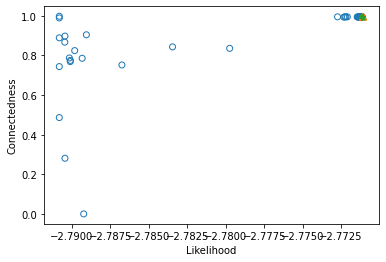

In [122]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

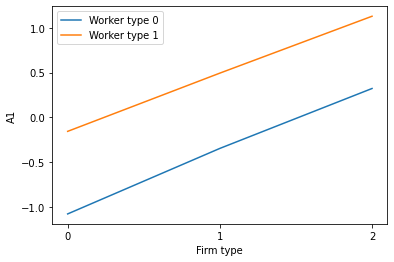

In [123]:
blm_fit.plot_A1()

In [124]:
display(blm_fit.model.A1_indep['l'])
display(blm_fit.model.A1)

KeyError: 'l'

In [125]:
display(blm_fit.model.A2_indep['l'])
display(blm_fit.model.A2)

KeyError: 'l'

In [126]:
np.expand_dims(blm_fit.model.A1_indep['l'], 1) + blm_fit.model.A1

KeyError: 'l'

In [118]:
np.expand_dims(blm_fit.model.A2_indep['l'], 1) + blm_fit.model.A2

array([[-0.21199976, -0.37135873,  0.64304726],
       [-0.56595819,  0.78867753,  0.11939135]])

In [108]:
import pandas as pd
display(sim_data.groupby('l1')['alpha1'].mean())
display(sim_data.groupby('k1')['psi1'].mean())

l1
0.0   -0.430727
1.0    0.430727
Name: alpha1, dtype: float64

k1
0.0   -0.67449
1.0    0.00000
2.0    0.67449
Name: psi1, dtype: float64

In [127]:
np.expand_dims(sim_data.groupby('l1')['alpha1'].mean().to_numpy(), 1) + np.tile(sim_data.groupby('k1')['psi1'].mean().to_numpy(), (2, 1))

array([[-1.10521705, -0.4307273 ,  0.24376245],
       [-0.24376245,  0.4307273 ,  1.10521705]])

In [128]:
blm_fit.model.A1

array([[-1.07878857, -0.34665688,  0.32289149],
       [-0.15604639,  0.49474337,  1.13039503]])

# Measuring the Model's Effectiveness

## Simulate some data

The package contains functions to simulate data. We use this here to compare model estimates to true parameter values.

## Set parameter choices

In [10]:
blm_sim_params = tw.sim_params({'nl': nl, 'nk': nk, 'firm_size': 10, 'NNm': np.ones(shape=(nk, nk)).astype(int, copy=False), 'NNs': np.ones(shape=nk).astype(int, copy=False), 'mmult': 100, 'smult': 100, 'a1_sig': 10, 'a2_sig': 10, 's1_min': 0, 's1_max': 0.001, 's2_min': 0, 's2_max': 0.001})
blm_params = tw.blm_params({'nl': nl, 'nk': nk, 'cons_a': ([], {}), 'fixb': False, 'stationary': False, 'n_iters_movers': 100, 'threshold_movers': 1e-7, 'd_prior': 1.0000, 'verbose': 0, 'custom_dependent_dict': {}, 'verbose': 2, 'custom_independent_dict': {'l': nl}, 'custom_nosplit_columns': []})

## Simulate data

In [11]:
blm_true = tw.SimBLM(blm_sim_params)
sim_data, sim_params = blm_true.simulate(return_parameters=True)
#####
sim_data['jdata']['l1'] = sim_data['jdata']['l']
sim_data['jdata']['l2'] = sim_data['jdata']['l']
sim_data['sdata']['l1'] = sim_data['sdata']['l']
sim_data['sdata']['l2'] = sim_data['sdata']['l']
del sim_data['jdata']['l'], sim_data['sdata']['l']
#####
sim_data['jdata'] = bpd.BipartiteDataFrame(i=np.arange(len(sim_data['jdata'])), **sim_data['jdata'])
sim_data['sdata'] = bpd.BipartiteDataFrame(i=np.arange(len(sim_data['sdata'])), **sim_data['sdata'])

In [12]:
print('Movers data')
display(sim_data['jdata'])
print('Stayers data')
display(sim_data['sdata'])

Movers data


,i,j1,j2,y1,y2,g1,g2,l1,l2
0,0,6,4,4.561441,-23.029312,0,0,0,0
1,1,0,4,4.561320,-23.026752,0,0,0,0
2,2,3,0,4.561287,-23.027811,0,0,0,0
3,3,4,1,4.561628,-23.028728,0,0,0,0
4,4,7,0,4.561108,-23.029133,0,0,0,0
...,...,...,...,...,...,...,...,...,...
895,895,21,29,14.090348,3.399401,2,2,1,1
896,896,28,21,14.091484,3.400040,2,2,1,1
897,897,23,28,14.090945,3.399127,2,2,1,1
898,898,25,24,14.091115,3.399706,2,2,1,1


Stayers data


,i,j1,j2,y1,y2,g1,g2,l1,l2
0,0,9,9,-12.688356,-17.142885,0,0,1,1
1,1,0,0,-12.688343,-17.143329,0,0,1,1
2,2,3,3,-12.688326,-17.144492,0,0,1,1
3,3,7,7,-12.688374,-17.144733,0,0,1,1
4,4,3,3,-12.688325,-17.142429,0,0,1,1
...,...,...,...,...,...,...,...,...,...
295,295,20,20,14.090869,3.398748,2,2,1,1
296,296,22,22,14.091722,3.399824,2,2,1,1
297,297,26,26,14.089946,3.398633,2,2,1,1
298,298,26,26,14.090420,3.400168,2,2,1,1


## Initialize and run BLMEstimator

In [22]:
# Initialize BLM model (WRONG CODE, DELETE THIS AFTER TESTING!!!!)
blm_fit = tw.BLMModel(blm_params)
blm_fit.A1 = sim_params['A1']
blm_fit.A2 = sim_params['A2']
blm_fit.S1 = sim_params['S1']
blm_fit.S2 = sim_params['S2']
blm_fit.A1_indep['l'] *= 0.01
blm_fit.A2_indep['l'] *= 0.01
# Fit BLM estimator
blm_fit.fit_movers(jdata=sim_data['jdata'])
blm_fit.fit_stayers(sdata=sim_data['sdata'])

loop 0, liks -2.134691497951756
A1 before:
[[  4.56129958   2.27553048   9.16508002]
 [-12.68843457  -1.36279228  14.09087218]]
A2 before:
[[-23.0276138  -12.39857339  -5.88377822]
 [-17.14387291  22.67510557   3.39919452]]
S1 before:
[[2.62175086e-04 7.21297974e-04 6.39047557e-04]
 [7.19778643e-05 1.37924871e-05 7.59219616e-04]]
S2 before:
[[0.00079482 0.00063979 0.00043839]
 [0.00071716 0.0005335  0.00044609]]
A1_indep before:
{'l': array([-0.00288263,  0.00995298])}
A2_indep before:
{'l': array([-0.01107685, -0.00378586])}
A_indep before:
{}
res a:
[  4.56128351   2.27561078   9.1650406  -12.68843365  -1.36279117
  14.09077538   5.31835651   0.96043548   5.31835651   0.96043548
 -23.02776529 -12.39855272  -5.88370183 -17.1439222   22.67511632
   3.39920123 -15.41244484   4.28166547 -15.41244484   4.28166547]
res s:
[ 28.28491598  28.28491648  28.28491632   0.92243632   0.92243631
   0.92243688  28.28491624   0.92243652  28.28491624   0.92243652
 237.54345669 237.54345648 237.5434562

NameError: name 'stop' is not defined

In [14]:
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(blm_params)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data['jdata'], sdata=sim_data['sdata'], n_init=40, n_best=5, ncore=1)

  0%|                                                    | 0/40 [00:00<?, ?it/s]

Running fixm movers
loop 0, liks -125.27939930590125
loop 1, liks -7.725566632684098
loop 2, liks -7.655272564885638
loop 3, liks -7.646926014131649
loop 4, liks -7.645661646059456
loop 5, liks -7.6453759863342565
loop 6, liks -7.645259738916001
loop 7, liks -7.645172498951191
loop 8, liks -7.645089509880524
loop 9, liks -7.645005920984148
loop 10, liks -7.6449207360792615
loop 11, liks -7.644833729076746
loop 12, liks -7.644744834342945
loop 13, liks -7.644654021192889
loop 14, liks -7.644561267734647
loop 15, liks -7.6444665554518885
loop 16, liks -7.6443698681758105
loop 17, liks -7.644271191992931
loop 18, liks -7.644170515353931
loop 19, liks -7.644067829226214
loop 20, liks -7.6439631272558355
loop 21, liks -7.643856405930837
loop 22, liks -7.64374766474352
loop 23, liks -7.6436369063503316
loop 24, liks -7.643524136728244
loop 25, liks -7.64340936532645
loop 26, liks -7.643292605212173
loop 27, liks -7.643173873209296
loop 28, liks -7.643053190028469
loop 29, liks -7.64293058038

  2%|█                                           | 1/40 [00:01<00:40,  1.03s/it]

loop 10, liks -6.919777716396093
loop 11, liks -6.919777785724111
Running fixm movers
loop 0, liks -139.03667342217832
loop 1, liks -7.700489961685616
loop 2, liks -7.643422863048909
loop 3, liks -7.630664063659986
loop 4, liks -7.626451988338377
loop 5, liks -7.623683300041723
loop 6, liks -7.6211070472751645
loop 7, liks -7.618465952330296
loop 8, liks -7.6157001033990435
loop 9, liks -7.612796988977264
loop 10, liks -7.609764177137305
loop 11, liks -7.606624812777021
loop 12, liks -7.603416577273355
loop 13, liks -7.60018968656321
loop 14, liks -7.597002893333987
loop 15, liks -7.593917702646821
loop 16, liks -7.590991778066273
loop 17, liks -7.588272905618271
loop 18, liks -7.585794776310515
loop 19, liks -7.583575292762104
loop 20, liks -7.581617362352261
loop 21, liks -7.5799115304532725
loop 22, liks -7.578439533104908
loop 23, liks -7.577177913364661
loop 24, liks -7.57610111594729
loop 25, liks -7.575183789653705
loop 26, liks -7.574402277065878
loop 27, liks -7.57373541749701

  5%|██▏                                         | 2/40 [00:01<00:28,  1.33it/s]

loop 4, liks -7.591480184103835
loop 5, liks -7.572776208628161
loop 6, liks -7.572780043954468
loop 7, liks -7.5525681649970995
loop 8, liks -7.5334422779522345
loop 9, liks -7.510581917562492
loop 10, liks -7.486349920863255
loop 11, liks -7.457275854290106
loop 12, liks -7.422751019057966
loop 13, liks -7.386438438142901
loop 14, liks -7.357006194094917
loop 15, liks -7.340434167865985
loop 16, liks -7.333570897798188
loop 17, liks -7.331038155123194
loop 18, liks -7.3301082326425036
loop 19, liks -7.329758364357092
loop 20, liks -7.329622824028792
loop 21, liks -7.329568868185482
loop 22, liks -7.329546989259626
loop 23, liks -7.329538087349292
loop 24, liks -7.32953461624128
loop 25, liks -7.329533531313133
loop 26, liks -7.329533613365554
Running unconstrained movers
loop 0, liks -7.329533613365554
loop 1, liks -7.1231829205042025
loop 2, liks -6.924586165367352
loop 3, liks -6.9211921575982425
loop 4, liks -6.9237706005157555
loop 5, liks -6.924024485844127
loop 6, liks -6.92398

loop 27, liks -6.924001069124012
loop 28, liks -6.9240040463455275
loop 29, liks -6.924007293756318
loop 30, liks -6.924010834448662
loop 31, liks -6.92401469320498
loop 32, liks -6.924018896563696
loop 33, liks -6.924023472874444
loop 34, liks -6.924028452338784
loop 35, liks -6.924033867032138
loop 36, liks -6.924039750901401
loop 37, liks -6.9240461397321935
loop 38, liks -6.924053071078461
loop 39, liks -6.924060584146128
loop 40, liks -6.92406871962148
loop 41, liks -6.9240775194334905
loop 42, liks -6.9240870264386505
loop 43, liks -6.924097284015146
loop 44, liks -6.924108335552942
loop 45, liks -6.924120223825197
loop 46, liks -6.9241329902262745
loop 47, liks -6.924146673862029
loop 48, liks -6.924161310478643
loop 49, liks -6.924176931218372
loop 50, liks -6.924193561193267
loop 51, liks -6.924211217872212
loop 52, liks -6.924229909281691
loop 53, liks -6.92424963202778
loop 54, liks -6.9242703691544945
loop 55, liks -6.924292087861962
loop 56, liks -6.924314737116727
loop 57

  8%|███▎                                        | 3/40 [00:03<00:39,  1.07s/it]

loop 67, liks -6.9245850796742285
loop 68, liks -6.924604905862022
loop 69, liks -6.924622172875094
loop 70, liks -6.92463625889503
loop 71, liks -6.924646444272552
loop 72, liks -6.924651887677921
loop 73, liks -6.924651595383918
loop 74, liks -6.924644382667302
loop 75, liks -6.924628826537526
loop 76, liks -6.924603209432597
loop 77, liks -6.9245654542762125
loop 78, liks -6.924513052538449
loop 79, liks -6.92444298892167
loop 80, liks -6.924351669306201
loop 81, liks -6.924234862961477
loop 82, liks -6.924087676002477
loop 83, liks -6.9239045805930965
loop 84, liks -6.923679532729625
loop 85, liks -6.923406218589872
loop 86, liks -6.923078471517235
loop 87, liks -6.922690892560164
loop 88, liks -6.922239679369169
loop 89, liks -6.9217236147693955
loop 90, liks -6.921145088415501
loop 91, liks -6.920510938773493
loop 92, liks -6.919832844325101
loop 93, liks -6.919127010729483
loop 94, liks -6.91841302953301
loop 95, liks -6.917712009805157
loop 96, liks -6.9170443272507045
loop 97,

 10%|████▍                                       | 4/40 [00:04<00:39,  1.08s/it]

loop 89, liks -6.914773287360311
loop 90, liks -6.914794550419224
loop 91, liks -6.914814518536834
loop 92, liks -6.914833263051522
loop 93, liks -6.914850852814752
loop 94, liks -6.914867353966414
loop 95, liks -6.914882829797336
loop 96, liks -6.914897340679315
loop 97, liks -6.914910944047244
loop 98, liks -6.914923694420481
loop 99, liks -6.914935643454145
Running fixm movers
loop 0, liks -93.64061924943587
loop 1, liks -7.626148214635037
loop 2, liks -7.57038627090254
loop 3, liks -7.560669265173034
loop 4, liks -7.5571963777790945
loop 5, liks -7.555132559972364
loop 6, liks -7.55344972282049
loop 7, liks -7.551908567474372
loop 8, liks -7.550460745297736
loop 9, liks -7.549098726924264
loop 10, liks -7.5478227898071975
loop 11, liks -7.5466334956238015
loop 12, liks -7.54553012820645
loop 13, liks -7.544510577016048
loop 14, liks -7.54357157530913
loop 15, liks -7.542709007672104
loop 16, liks -7.541918203480157
loop 17, liks -7.541194189468968
loop 18, liks -7.540531893946288
l

 12%|█████▌                                      | 5/40 [00:05<00:38,  1.10s/it]

loop 95, liks -7.713994137170188
loop 96, liks -7.714388402891919
loop 97, liks -7.714868536582955
loop 98, liks -7.715490973217156
loop 99, liks -7.716320688602197
Running unconstrained movers
loop 0, liks -7.717435092463624
loop 1, liks -6.904360434587185
loop 2, liks -6.9051234438047615
loop 3, liks -6.913435065131539
loop 4, liks -6.914982547538123
loop 5, liks -6.91491263757955
loop 6, liks -6.914874168640058
loop 7, liks -6.914857855660048
loop 8, liks -6.914839218498985
loop 9, liks -6.914820806543544
loop 10, liks -6.914804357473832
loop 11, liks -6.914790057703304
loop 12, liks -6.914777744171294
loop 13, liks -6.914767202122901
loop 14, liks -6.914758219250128
loop 15, liks -6.914750600254635
loop 16, liks -6.91474417139519
loop 17, liks -6.914738781074047
loop 18, liks -6.914734298723593
loop 19, liks -6.914730612810838
loop 20, liks -6.914727628248774
loop 21, liks -6.9147252633521745
loop 22, liks -6.91472344647238
loop 23, liks -6.914722112518189
loop 24, liks -6.91472119

 15%|██████▌                                     | 6/40 [00:06<00:34,  1.00s/it]

loop 23, liks -7.575241948144345
loop 24, liks -7.576486953241066
loop 25, liks -7.577092411441388
loop 26, liks -7.577417922241332
loop 27, liks -7.577597062845406
loop 28, liks -7.577697124828202
loop 29, liks -7.577754039638752
loop 30, liks -7.577787137692345
loop 31, liks -7.577806673367486
loop 32, liks -7.577817371415538
loop 33, liks -7.577823478373414
loop 34, liks -7.577831354638978
loop 35, liks -7.577833962850287
loop 36, liks -7.5778352143748915
loop 37, liks -7.5778185084513705
loop 38, liks -7.577851445476822
loop 39, liks -7.577855943234669
loop 40, liks -7.5778565813023455
loop 41, liks -7.577856754985625
loop 42, liks -7.577856830797666
Running unconstrained movers
loop 0, liks -7.577856830797666
loop 1, liks -7.087478856394443
loop 2, liks -6.910602657693577
loop 3, liks -6.909179224820356
loop 4, liks -6.912450443948411
loop 5, liks -6.913152753905293
loop 6, liks -6.913277607932608
loop 7, liks -6.913308126205597
loop 8, liks -6.913317082710985
loop 9, liks -6.9133

loop 49, liks -6.911594226631518
loop 50, liks -6.9115803324239256
loop 51, liks -6.911567191200277
loop 52, liks -6.911554806396345
loop 53, liks -6.9115431701863255
loop 54, liks -6.911532265959288
loop 55, liks -6.911522070481721
loop 56, liks -6.911512555739545
loop 57, liks -6.911503690472704
loop 58, liks -6.911495441427016
loop 59, liks -6.911487774354726
loop 60, liks -6.911480654797478
loop 61, liks -6.911474048684936
loop 62, liks -6.911467922780319
loop 63, liks -6.911462245000746
loop 64, liks -6.911456984637024
loop 65, liks -6.911452112493695
loop 66, liks -6.911447600966996
loop 67, liks -6.911443424075192
loop 68, liks -6.911439557453087
loop 69, liks -6.911435978320283
loop 70, liks -6.911432665430628
loop 71, liks -6.911429599008874
loop 72, liks -6.911426760679127
loop 73, liks -6.911424133388561
loop 74, liks -6.911421701329177
loop 75, liks -6.911419449859444
loop 76, liks -6.911417365427369
loop 77, liks -6.9114154354959565
loop 78, liks -6.9114136484717585
loop 7

 18%|███████▋                                    | 7/40 [00:07<00:38,  1.18s/it]

loop 89, liks -6.911400866870729
loop 90, liks -6.911400152517738
loop 91, liks -6.911399490410035
loop 92, liks -6.9113988766912655
loop 93, liks -6.911398307794006
loop 94, liks -6.911397780417671
loop 95, liks -6.911397291508088
loop 96, liks -6.911396838238728
loop 97, liks -6.911396417993405
loop 98, liks -6.911396028350279
loop 99, liks -6.911395667067167
Running fixm movers
loop 0, liks -78.5300448758366
loop 1, liks -7.638394824691927
loop 2, liks -7.577361906493461
loop 3, liks -7.565101108780834
loop 4, liks -7.561833813682812
loop 5, liks -7.560371148254928
loop 6, liks -7.5593994676710565
loop 7, liks -7.55859596654935
loop 8, liks -7.55787842295258
loop 9, liks -7.557221783298826
loop 10, liks -7.556615892260334
loop 11, liks -7.556054999381079
loop 12, liks -7.555534964301989
loop 13, liks -7.555052385141282
loop 14, liks -7.554604253434485
loop 15, liks -7.554187781847325
loop 16, liks -7.553800306325789
loop 17, liks -7.553439229041593
loop 18, liks -7.553101986466523
l

 20%|████████▊                                   | 8/40 [00:08<00:35,  1.11s/it]

loop 13, liks -6.913320662410711
Running fixm movers
loop 0, liks -94.95808093190534
loop 1, liks -7.8378319484995025
loop 2, liks -7.798105760873105
loop 3, liks -7.784119402786922
loop 4, liks -7.779618000547332
loop 5, liks -7.77717167559627
loop 6, liks -7.775367073843236
loop 7, liks -7.773851674137014
loop 8, liks -7.772543179908788
loop 9, liks -7.771415197568671
loop 10, liks -7.770450437332807
loop 11, liks -7.769631382385212
loop 12, liks -7.768939650470111
loop 13, liks -7.7683569688875505
loop 14, liks -7.767866122726525
loop 15, liks -7.767451561691059
loop 16, liks -7.767099681069633
loop 17, liks -7.766798864185653
loop 18, liks -7.766539374125799
loop 19, liks -7.766313163940641
loop 20, liks -7.766113653578122
loop 21, liks -7.765935504096585
loop 22, liks -7.76577440654205
loop 23, liks -7.765626893917994
loop 24, liks -7.765490179024993
loop 25, liks -7.76536201765833
loop 26, liks -7.765240594934835
loop 27, liks -7.765124431788089
loop 28, liks -7.765012308517402
l

 22%|█████████▉                                  | 9/40 [00:09<00:33,  1.09s/it]

loop 7, liks -6.913303216107484
loop 8, liks -6.9133157280503195
loop 9, liks -6.913319281114834
loop 10, liks -6.913320282293232
loop 11, liks -6.913320563734463
loop 12, liks -6.913320642827743
Running fixm movers
loop 0, liks -112.9576899164626
loop 1, liks -7.6847379433099094
loop 2, liks -7.602200616130758
loop 3, liks -7.591305690076669
loop 4, liks -7.589031428720516
loop 5, liks -7.588505183145821
loop 6, liks -7.588344206729867
loop 7, liks -7.588260259772193
loop 8, liks -7.58819145637872
loop 9, liks -7.588124017692681
loop 10, liks -7.5880546862725256
loop 11, liks -7.587982538251073
loop 12, liks -7.587907172846321
loop 13, liks -7.587828307461964
loop 14, liks -7.5877456859365395
loop 15, liks -7.587659056954914
loop 16, liks -7.587568168253219
loop 17, liks -7.587472764438205
loop 18, liks -7.587372585710336
loop 19, liks -7.587267366904212
loop 20, liks -7.587156836735204
loop 21, liks -7.587040717247341
loop 22, liks -7.58691872348226
loop 23, liks -7.586790563396058
l

 25%|██████████▊                                | 10/40 [00:10<00:29,  1.01it/s]

loop 20, liks -7.330670284288931
loop 21, liks -7.3310651399743065
loop 22, liks -7.331594300865098
loop 23, liks -7.33229117400745
loop 24, liks -7.333190550160323
loop 25, liks -7.334317282458145
loop 26, liks -7.335662204309083
loop 27, liks -7.337135442404587
loop 28, liks -7.338487193573342
loop 29, liks -7.3392009497789426
loop 30, liks -7.338423582694897
loop 31, liks -7.335134895758912
loop 32, liks -7.328736966272656
loop 33, liks -7.319801016233598
loop 34, liks -7.310981297500673
loop 35, liks -7.305275628057284
loop 36, liks -7.30265241985584
loop 37, liks -7.301625261993086
loop 38, liks -7.3012429507691134
loop 39, liks -7.3011037416805795
loop 40, liks -7.301053923457451
loop 41, liks -7.301036343216327
loop 42, liks -7.301030202677589
loop 43, liks -7.301028075525028
loop 44, liks -7.301027342685579
loop 45, liks -7.301027090995205
loop 46, liks -7.301027004193394
Running unconstrained movers
loop 0, liks -7.301027004193394
loop 1, liks -7.091464196390136
loop 2, liks -

 28%|███████████▊                               | 11/40 [00:11<00:29,  1.03s/it]

loop 11, liks -6.913325393223695
loop 12, liks -6.913324722663386
loop 13, liks -6.913324101328518
loop 14, liks -6.9133235625116
loop 15, liks -6.913323104724732
loop 16, liks -6.913322718391872
loop 17, liks -6.913322393104259
loop 18, liks -6.913322119437111
loop 19, liks -6.913321889269739
loop 20, liks -6.91332169571411
loop 21, liks -6.913321532958455
loop 22, liks -6.913321396108196
loop 23, liks -6.913321281044129
loop 24, liks -6.913321184300702
Running fixm movers
loop 0, liks -113.09468704840944
loop 1, liks -7.845266960632094
loop 2, liks -7.792531224355982
loop 3, liks -7.783550793797834
loop 4, liks -7.781135704835025
loop 5, liks -7.779611295285877
loop 6, liks -7.778315705369075
loop 7, liks -7.777121626290333
loop 8, liks -7.776007403979503
loop 9, liks -7.774969158020108
loop 10, liks -7.77400538664472
loop 11, liks -7.773113784195869
loop 12, liks -7.772290809856582
loop 13, liks -7.771531862610328
loop 14, liks -7.770831583892215
loop 15, liks -7.770184163895524
loo

 30%|████████████▉                              | 12/40 [00:12<00:28,  1.02s/it]

loop 5, liks -6.913025324011048
loop 6, liks -6.913240796065369
loop 7, liks -6.913298082070336
loop 8, liks -6.9133142806485965
loop 9, liks -6.913318872024085
loop 10, liks -6.913320166446597
loop 11, liks -6.913320530927481
loop 12, liks -6.913320633540427
loop 13, liks -6.9133206624090064
Running fixm movers
loop 0, liks -67.6752624426885
loop 1, liks -7.7855813151864295
loop 2, liks -7.718724334687218
loop 3, liks -7.713010954086476
loop 4, liks -7.712077596108243
loop 5, liks -7.711864571564348
loop 6, liks -7.711755546617359
loop 7, liks -7.7116661394017765
loop 8, liks -7.711581190326099
loop 9, liks -7.711497784519473
loop 10, liks -7.711415325050605
loop 11, liks -7.711333697313336
loop 12, liks -7.711252890126589
loop 13, liks -7.711172914442028
loop 14, liks -7.711093785397489
loop 15, liks -7.711015518297809
loop 16, liks -7.710938127703823
loop 17, liks -7.710861627223319
loop 18, liks -7.710786029463252
loop 19, liks -7.710711346021026
loop 20, liks -7.710637587487075
lo

 32%|█████████████▉                             | 13/40 [00:13<00:27,  1.03s/it]

loop 97, liks -7.7497510965391605
loop 98, liks -7.749749979502258
loop 99, liks -7.749749031589209
Running unconstrained movers
loop 0, liks -7.749748227564239
loop 1, liks -6.980351896125844
loop 2, liks -6.905281219265155
loop 3, liks -6.9153031721889295
loop 4, liks -6.919242524291236
loop 5, liks -6.919712571194726
loop 6, liks -6.919760084813693
loop 7, liks -6.919774062273227
loop 8, liks -6.919779262160436
loop 9, liks -6.919780842023245
loop 10, liks -6.919781288438363
loop 11, liks -6.919781424983489
loop 12, liks -6.919781477862006
Running fixm movers
loop 0, liks -111.80401095435485
loop 1, liks -7.902759769194886
loop 2, liks -7.853108416532343
loop 3, liks -7.848117008697846
loop 4, liks -7.8468893254130485
loop 5, liks -7.846279683836832
loop 6, liks -7.845805134465256
loop 7, liks -7.8454048679430555
loop 8, liks -7.845063395810897
loop 9, liks -7.844771160580115
loop 10, liks -7.844519965440803
loop 11, liks -7.844302690544836
loop 12, liks -7.844113271249551
loop 13, 

 35%|███████████████                            | 14/40 [00:14<00:24,  1.06it/s]

loop 9, liks -6.913319677581686
loop 10, liks -6.913320403469865
loop 11, liks -6.913320606978824
loop 12, liks -6.913320664835314
Running fixm movers
loop 0, liks -116.51923532297761
loop 1, liks -7.702976625539539
loop 2, liks -7.6541518078212105
loop 3, liks -7.648133761292009
loop 4, liks -7.646926698231619
loop 5, liks -7.646220272393838
loop 6, liks -7.64560917578656
loop 7, liks -7.645023301431569
loop 8, liks -7.644453637123862
loop 9, liks -7.643899512707681
loop 10, liks -7.643361665847256
loop 11, liks -7.642840920185828
loop 12, liks -7.642337959306259
loop 13, liks -7.641853281909271
loop 14, liks -7.6413871943848894
loop 15, liks -7.6409398131275825
loop 16, liks -7.6405110712739654
loop 17, liks -7.640100728455597
loop 18, liks -7.639708382874389
loop 19, liks -7.639333485123184
loop 20, liks -7.63897535319543
loop 21, liks -7.638633188150497
loop 22, liks -7.638306089940751
loop 23, liks -7.637993072962472
loop 24, liks -7.6376930809610615
loop 25, liks -7.6374050009964

 38%|████████████████▏                          | 15/40 [00:15<00:22,  1.11it/s]

Running fixm movers
loop 0, liks -144.77239747743903
loop 1, liks -7.726972427362798
loop 2, liks -7.662461259785077
loop 3, liks -7.655802843454015
loop 4, liks -7.6548835092900465
loop 5, liks -7.654725128468097
loop 6, liks -7.6546811462510576
loop 7, liks -7.65465598293647
loop 8, liks -7.654634241756862
loop 9, liks -7.654613070158634
loop 10, liks -7.654591904506385
loop 11, liks -7.654570632854264
loop 12, liks -7.654549240149421
loop 13, liks -7.654527735419561
loop 14, liks -7.654506136469688
loop 15, liks -7.654484466583793
loop 16, liks -7.654462753713549
loop 17, liks -7.654441030123825
loop 18, liks -7.654419332059134
loop 19, liks -7.654397699339218
loop 20, liks -7.654376174868566
loop 21, liks -7.65435480406386
loop 22, liks -7.654333634210082
loop 23, liks -7.654312713759699
loop 24, liks -7.65429209159212
loop 25, liks -7.654271816252445
loop 26, liks -7.654251935189744
loop 27, liks -7.654232494015287
loop 28, liks -7.65421353580055
loop 29, liks -7.6541951004332915


 40%|█████████████████▏                         | 16/40 [00:16<00:22,  1.07it/s]

loop 10, liks -6.908517522365669
Running fixm movers
loop 0, liks -121.09691866945947
loop 1, liks -7.677416499566714
loop 2, liks -7.632067797012757
loop 3, liks -7.6246805985174495
loop 4, liks -7.623667621605897
loop 5, liks -7.623364620675656
loop 6, liks -7.62317531569489
loop 7, liks -7.623005191522591
loop 8, liks -7.622840555054906
loop 9, liks -7.622679069620301
loop 10, liks -7.622520385501381
loop 11, liks -7.622364499290126
loop 12, liks -7.62221146819416
loop 13, liks -7.6220613546701355
loop 14, liks -7.621914215445235
loop 15, liks -7.62177009936097
loop 16, liks -7.621629047081321
loop 17, liks -7.621491091229401
loop 18, liks -7.6213562566474256
loop 19, liks -7.621224560710138
loop 20, liks -7.621096013671679
loop 21, liks -7.620970619036672
loop 22, liks -7.620848373948758
loop 23, liks -7.620729269590714
loop 24, liks -7.620613291590732
loop 25, liks -7.620500420429984
loop 26, liks -7.620390631847108
loop 27, liks -7.620283897235802
loop 28, liks -7.620180184032262

 42%|██████████████████▎                        | 17/40 [00:16<00:20,  1.13it/s]

loop 25, liks -7.337496243181366
loop 26, liks -7.33833882437887
loop 27, liks -7.339285768234723
loop 28, liks -7.339765463731852
loop 29, liks -7.338902215310977
loop 30, liks -7.335648409088215
loop 31, liks -7.3293452003344015
loop 32, liks -7.320453710925625
loop 33, liks -7.311484798122069
loop 34, liks -7.305536669723123
loop 35, liks -7.302758656226247
loop 36, liks -7.3016652921643965
loop 37, liks -7.301257577713017
loop 38, liks -7.301109023452519
loop 39, liks -7.301055794208393
loop 40, liks -7.301037008183509
loop 41, liks -7.301030440139188
loop 42, liks -7.301028166402626
loop 43, liks -7.301027383012416
loop 44, liks -7.301027115127376
loop 45, liks -7.301027023652456
Running unconstrained movers
loop 0, liks -7.301027023652456
loop 1, liks -7.091464223645192
loop 2, liks -6.890986864796171
loop 3, liks -6.901463267185145
loop 4, liks -6.906256122378064
loop 5, liks -6.906385784429113
loop 6, liks -6.906325798706298
loop 7, liks -6.9063239903751175
loop 8, liks -6.9063

 45%|███████████████████▎                       | 18/40 [00:18<00:22,  1.00s/it]

loop 17, liks -6.908705203214902
loop 18, liks -6.908733782767542
loop 19, liks -6.908766516837748
loop 20, liks -6.908804186488764
loop 21, liks -6.908847843176971
loop 22, liks -6.908898904060128
loop 23, liks -6.908959252382489
loop 24, liks -6.9090313191835175
loop 25, liks -6.909118104316911
loop 26, liks -6.909223073646211
loop 27, liks -6.909349854151424
loop 28, liks -6.909501658238957
loop 29, liks -6.90968042969173
loop 30, liks -6.909885835235003
loop 31, liks -6.910114402523583
loop 32, liks -6.910359225594288
loop 33, liks -6.910610575041564
loop 34, liks -6.910857403576556
loop 35, liks -6.91108929238273
loop 36, liks -6.911298152834494
loop 37, liks -6.91147915529959
loop 38, liks -6.911630761055779
loop 39, liks -6.911754091756032
loop 40, liks -6.911852010579286
loop 41, liks -6.911928232572911
loop 42, liks -6.911986640684486
loop 43, liks -6.91203085277217
loop 44, liks -6.912064004617335
loop 45, liks -6.912088684282787
loop 46, liks -6.912106955629891
loop 47, liks

loop 8, liks -6.919775529094279
loop 9, liks -6.919778038175434
loop 10, liks -6.919779437812685
loop 11, liks -6.919780558598727
loop 12, liks -6.919781633115209
loop 13, liks -6.919782728210892
loop 14, liks -6.919783867292317
loop 15, liks -6.919785062402924
loop 16, liks -6.919786322891941
loop 17, liks -6.919787657854615
loop 18, liks -6.919789076860986
loop 19, liks -6.919790590214033
loop 20, liks -6.919792209082771
loop 21, liks -6.919793945606803
loop 22, liks -6.9197958129992445
loop 23, liks -6.919797825656443
loop 24, liks -6.919799999277198
loop 25, liks -6.919802350993155
loop 26, liks -6.919804899511718
loop 27, liks -6.919807665272608
loop 28, liks -6.91981067061963
loop 29, liks -6.919813939989088
loop 30, liks -6.919817500116402
loop 31, liks -6.919821380263053
loop 32, liks -6.919825612465534
loop 33, liks -6.919830231808857
loop 34, liks -6.919835276726862
loop 35, liks -6.919840789332214
loop 36, liks -6.919846815779114
loop 37, liks -6.919853406661932
loop 38, lik

 48%|████████████████████▍                      | 19/40 [00:19<00:24,  1.15s/it]

loop 91, liks -6.929639119607247
loop 92, liks -6.930169234214504
loop 93, liks -6.930650636376219
loop 94, liks -6.931074747406083
loop 95, liks -6.931437198234428
loop 96, liks -6.931738034348254
loop 97, liks -6.9319811375652005
loop 98, liks -6.932173085767352
loop 99, liks -6.932321815021245
Running fixm movers
loop 0, liks -86.52170370340875
loop 1, liks -7.693307201353206
loop 2, liks -7.624651554260112
loop 3, liks -7.618515611671594
loop 4, liks -7.617604480918425
loop 5, liks -7.6173569981529905
loop 6, liks -7.617198939799586
loop 7, liks -7.617058054546521
loop 8, liks -7.616923353043694
loop 9, liks -7.616792897485543
loop 10, liks -7.616666258102714
loop 11, liks -7.6165432836138605
loop 12, liks -7.616423873201907
loop 13, liks -7.616307931883411
loop 14, liks -7.6161953620082175
loop 15, liks -7.616086062212981
loop 16, liks -7.615979927926233
loop 17, liks -7.615876852177282
loop 18, liks -7.615776726438259
loop 19, liks -7.615679441437099
loop 20, liks -7.615584887924

 50%|█████████████████████▌                     | 20/40 [00:20<00:22,  1.11s/it]

loop 0, liks -7.812418709054242
loop 1, liks -7.004804941376602
loop 2, liks -6.905069622426913
loop 3, liks -6.90843901824107
loop 4, liks -6.912105899229803
loop 5, liks -6.913025327494076
loop 6, liks -6.913240798877256
loop 7, liks -6.9132980843993455
loop 8, liks -6.913314282597134
loop 9, liks -6.913318873659609
loop 10, liks -6.913320167820799
loop 11, liks -6.9133205320825155
loop 12, liks -6.913320634511369
loop 13, liks -6.913320663225211
Running fixm movers
loop 0, liks -96.30437996156024
loop 1, liks -7.73086079691791
loop 2, liks -7.658907468631968
loop 3, liks -7.652286896308925
loop 4, liks -7.650950573852885
loop 5, liks -7.650476910206851
loop 6, liks -7.650168879126336
loop 7, liks -7.649892938719556
loop 8, liks -7.649621572159188
loop 9, liks -7.649348264499861
loop 10, liks -7.64907111982145
loop 11, liks -7.648789278564071
loop 12, liks -7.648502122171495
loop 13, liks -7.648209094387447
loop 14, liks -7.64790966264317
loop 15, liks -7.647603311854354
loop 16, lik

loop 36, liks -6.914395276071358
loop 37, liks -6.914359221877109
loop 38, liks -6.91432538825051
loop 39, liks -6.914293660180312
loop 40, liks -6.914263926574232
loop 41, liks -6.9142360805372025
loop 42, liks -6.914210019561211
loop 43, liks -6.914185645640393
loop 44, liks -6.914162865323689
loop 45, liks -6.914141589715699
loop 46, liks -6.91412173443538
loop 47, liks -6.914103219540918
loop 48, liks -6.914085969427882
loop 49, liks -6.91406991270691
loop 50, liks -6.914054982066013
loop 51, liks -6.914041114122014
loop 52, liks -6.914028249264653
loop 53, liks -6.914016331496541
loop 54, liks -6.914005308271175
loop 55, liks -6.913995130331323
loop 56, liks -6.913985751549109
loop 57, liks -6.9139771287691225
loop 58, liks -6.913969221655639
loop 59, liks -6.913961992544289
loop 60, liks -6.913955406299271
loop 61, liks -6.9139494301758235
loop 62, liks -6.913944033688555
loop 63, liks -6.913939188485638
loop 64, liks -6.9139348682288295
loop 65, liks -6.9139310484791725
loop 66,

 52%|██████████████████████▌                    | 21/40 [00:22<00:23,  1.22s/it]

loop 77, liks -6.913917514464107
loop 78, liks -6.913918665786308
loop 79, liks -6.91392012291697
loop 80, liks -6.91392187945713
loop 81, liks -6.913923929672132
loop 82, liks -6.913926268435626
loop 83, liks -6.913928891173904
loop 84, liks -6.91393179381012
loop 85, liks -6.91393497270779
loop 86, liks -6.913938424613232
loop 87, liks -6.913942146596259
loop 88, liks -6.913946135988481
loop 89, liks -6.913950390318679
loop 90, liks -6.913954907244305
loop 91, liks -6.9139596844784
loop 92, liks -6.9139647197108145
loop 93, liks -6.91397001052283
loop 94, liks -6.913975554293788
loop 95, liks -6.913981348098388
loop 96, liks -6.91398738859308
loop 97, liks -6.913993671889573
loop 98, liks -6.914000193413534
loop 99, liks -6.914006947745844
Running fixm movers
loop 0, liks -76.25341895838895
loop 1, liks -7.717413652057097
loop 2, liks -7.678159286597147
loop 3, liks -7.67128183183687
loop 4, liks -7.66952413842887
loop 5, liks -7.668550637705921
loop 6, liks -7.66776191580787
loop 7,

 55%|███████████████████████▋                   | 22/40 [00:23<00:20,  1.13s/it]

loop 12, liks -6.913320633540545
loop 13, liks -6.91332066240911
Running fixm movers
loop 0, liks -148.54489511361598
loop 1, liks -7.747445352513286
loop 2, liks -7.673401651614292
loop 3, liks -7.66219805584957
loop 4, liks -7.6599172025796785
loop 5, liks -7.659429251585039
loop 6, liks -7.659325057077068
loop 7, liks -7.6593037598879485
loop 8, liks -7.659299088616247
loop 9, liks -7.659296083648745
loop 10, liks -7.659291307731314
loop 11, liks -7.6592839440814195
loop 12, liks -7.659273782862465
loop 13, liks -7.659260762439116
loop 14, liks -7.659244863994217
loop 15, liks -7.659226086584765
loop 16, liks -7.659204440522424
loop 17, liks -7.659179944964856
loop 18, liks -7.65915262652261
loop 19, liks -7.6591225181594575
loop 20, liks -7.659089658220724
loop 21, liks -7.659054089548956
loop 22, liks -7.659015858674163
loop 23, liks -7.658975015072435
loop 24, liks -7.658931610488292
loop 25, liks -7.658885698316541
loop 26, liks -7.658837333039484
loop 27, liks -7.65878656971549

 57%|████████████████████████▋                  | 23/40 [00:24<00:18,  1.12s/it]

loop 96, liks -7.749753590413164
loop 97, liks -7.749752245734958
loop 98, liks -7.749751055242212
loop 99, liks -7.749750011287922
Running unconstrained movers
loop 0, liks -7.749749101965323
loop 1, liks -6.980352160311546
loop 2, liks -6.905280182262796
loop 3, liks -6.915301789864419
loop 4, liks -6.919241048892951
loop 5, liks -6.919710988045287
loop 6, liks -6.919758376922339
loop 7, liks -6.919772217273863
loop 8, liks -6.919777266835016
loop 9, liks -6.919778681774813
loop 10, liks -6.919778947327804
loop 11, liks -6.919778885653848
Running fixm movers
loop 0, liks -118.006929682024
loop 1, liks -7.797842031129286
loop 2, liks -7.733277383458143
loop 3, liks -7.727900264152292
loop 4, liks -7.726503288361608
loop 5, liks -7.725567458746166
loop 6, liks -7.724743859674525
loop 7, liks -7.723968188108666
loop 8, liks -7.723229820251557
loop 9, liks -7.722526398759983
loop 10, liks -7.7218572665119005
loop 11, liks -7.721222007537288
loop 12, liks -7.720620133743667
loop 13, liks 

 60%|█████████████████████████▊                 | 24/40 [00:25<00:16,  1.04s/it]

loop 51, liks -7.577828730547339
loop 52, liks -7.577829268716309
loop 53, liks -7.577830423845331
loop 54, liks -7.577831118204022
loop 55, liks -7.5778271272381446
loop 56, liks -7.577826741694294
loop 57, liks -7.577835466564891
loop 58, liks -7.577836636122343
loop 59, liks -7.577854200660614
loop 60, liks -7.577821704490909
loop 61, liks -7.577852262771471
loop 62, liks -7.57785631244893
loop 63, liks -7.577856781092125
loop 64, liks -7.577856867023356
Running unconstrained movers
loop 0, liks -7.577856867023356
loop 1, liks -7.087478877154976
loop 2, liks -6.910602658455029
loop 3, liks -6.909179225341575
loop 4, liks -6.912450444075917
loop 5, liks -6.913152753798307
loop 6, liks -6.913277607726838
loop 7, liks -6.913308125955726
loop 8, liks -6.913317082432853
loop 9, liks -6.9133196675654585
loop 10, liks -6.913320392490894
loop 11, liks -6.9133205949474705
loop 12, liks -6.9133206516511505
Running fixm movers
loop 0, liks -80.94161752494601
loop 1, liks -7.6392885096262955
lo

 62%|██████████████████████████▉                | 25/40 [00:26<00:17,  1.18s/it]

loop 61, liks -6.912775145113088
loop 62, liks -6.912628928999901
loop 63, liks -6.912526987479763
loop 64, liks -6.9124617495766305
loop 65, liks -6.912426338334614
loop 66, liks -6.912414714902663
loop 67, liks -6.912421712526822
loop 68, liks -6.912443000357817
loop 69, liks -6.912475007904493
loop 70, liks -6.912514831864846
loop 71, liks -6.912560139404125
loop 72, liks -6.9126090761705115
loop 73, liks -6.912660183323552
loop 74, liks -6.912712325260102
loop 75, liks -6.912764628167566
loop 76, liks -6.912816428687165
loop 77, liks -6.912867231572485
loop 78, liks -6.912916675103903
loop 79, liks -6.9129645030469105
loop 80, liks -6.913010542047691
loop 81, liks -6.913054683496005
loop 82, liks -6.913096869028318
loop 83, liks -6.913137078978823
loop 84, liks -6.9131753232072395
loop 85, liks -6.91321163383549
loop 86, liks -6.913246059514156
loop 87, liks -6.913278660911919
loop 88, liks -6.91330950718169
loop 89, liks -6.9133386732053586
loop 90, liks -6.913366237458971
loop 91

 65%|███████████████████████████▉               | 26/40 [00:27<00:15,  1.13s/it]

loop 65, liks -7.812292308708099
loop 66, liks -7.812349399735641
loop 67, liks -7.812380946461354
loop 68, liks -7.812398247747832
loop 69, liks -7.812407679382288
loop 70, liks -7.812412795841966
loop 71, liks -7.812415561688654
loop 72, liks -7.812417051733541
loop 73, liks -8.225212179131622
loop 74, liks -8.184333262263639
loop 75, liks -8.170448777481807
loop 76, liks -8.166419693823125
loop 77, liks -8.165266386734533
loop 78, liks -8.164935823625349
loop 79, liks -8.164841281410396
loop 80, liks -8.164814338489519
loop 81, liks -8.164806746237844
loop 82, liks -8.164804654600688
loop 83, liks -8.164803464285166
loop 84, liks -8.164803603032281
loop 85, liks -8.164803632025803
Running unconstrained movers
loop 0, liks -8.164803632025803
loop 1, liks -7.08452028826216
loop 2, liks -6.900539110388074
loop 3, liks -6.904357424470707
loop 4, liks -6.910957953840266
loop 5, liks -6.912745198226593
loop 6, liks -6.91316440297274
loop 7, liks -6.91327592077016
loop 8, liks -6.913307910

loop 45, liks -6.919869450956008
loop 46, liks -6.919877958607752
loop 47, liks -6.919887289942102
loop 48, liks -6.9198975248887375
loop 49, liks -6.919908751142542
loop 50, liks -6.919921064921184
loop 51, liks -6.919934571796762
loop 52, liks -6.919949387608904
loop 53, liks -6.919965639467414
loop 54, liks -6.919983466852928
loop 55, liks -6.920003022825031
loop 56, liks -6.920024475348139
loop 57, liks -6.920048008745912
loop 58, liks -6.920073825296227
loop 59, liks -6.920102146978628
loop 60, liks -6.920133217387704
loop 61, liks -6.920167303825156
loop 62, liks -6.920204699583651
loop 63, liks -6.920245726434695
loop 64, liks -6.9202907373307685
loop 65, liks -6.920340119328575
loop 66, liks -6.920394296735293
loop 67, liks -6.920453734470395
loop 68, liks -6.920518941622885
loop 69, liks -6.920590475163986
loop 70, liks -6.920668943746522
loop 71, liks -6.920755011479836
loop 72, liks -6.920849401509155
loop 73, liks -6.920952899140763
loop 74, liks -6.921066354133074
loop 75,

 68%|█████████████████████████████              | 27/40 [00:29<00:16,  1.24s/it]

loop 85, liks -6.923259726656387
loop 86, liks -6.923567240354973
loop 87, liks -6.923892082292917
loop 88, liks -6.924231173652502
loop 89, liks -6.924579565251357
loop 90, liks -6.924929883932066
loop 91, liks -6.92527173185226
loop 92, liks -6.9255911053089445
loop 93, liks -6.925869944364218
loop 94, liks -6.9260859724200765
loop 95, liks -6.926213022110705
loop 96, liks -6.926222051177779
loop 97, liks -6.926083011037857
loop 98, liks -6.925767631981381
loop 99, liks -6.925253032695132
Running fixm movers
loop 0, liks -109.3032450456618
loop 1, liks -7.65720139042226
loop 2, liks -7.5928479942675144
loop 3, liks -7.579932773959269
loop 4, liks -7.577218428126922
loop 5, liks -7.576057177933922
loop 6, liks -7.575112082262017
loop 7, liks -7.574163499206311
loop 8, liks -7.5731736588800365
loop 9, liks -7.572134212740292
loop 10, liks -7.571042334916324
loop 11, liks -7.569896604702665
loop 12, liks -7.568696392828874
loop 13, liks -7.567441893581051
loop 14, liks -7.56613428262154

 70%|██████████████████████████████             | 28/40 [00:30<00:15,  1.31s/it]

loop 77, liks -6.916989176107559
loop 78, liks -6.916893318316611
loop 79, liks -6.916800532736968
loop 80, liks -6.916710960326891
loop 81, liks -6.916624706657616
loop 82, liks -6.916541844083182
loop 83, liks -6.916462414277557
loop 84, liks -6.916386431024064
loop 85, liks -6.916313883151089
loop 86, liks -6.916244737519392
loop 87, liks -6.9161789419805375
loop 88, liks -6.9161164282406755
loop 89, liks -6.916057114578003
loop 90, liks -6.916000908376823
loop 91, liks -6.915947708452837
loop 92, liks -6.915897407155597
loop 93, liks -6.915849892243028
loop 94, liks -6.915805048530013
loop 95, liks -6.915762759318918
loop 96, liks -6.915722907624099
loop 97, liks -6.915685377204834
loop 98, liks -6.915650053423355
loop 99, liks -6.9156168239449896
Running fixm movers
loop 0, liks -137.63785388584392
loop 1, liks -7.64610866386541
loop 2, liks -7.593118458414784
loop 3, liks -7.58495046198024
loop 4, liks -7.581706494346069
loop 5, liks -7.578836312080641
loop 6, liks -7.57571448700

 72%|███████████████████████████████▏           | 29/40 [00:31<00:12,  1.17s/it]

loop 42, liks -7.3295114434478466
loop 43, liks -7.329514979481051
loop 44, liks -7.329517843047173
loop 45, liks -7.329520161189806
loop 46, liks -7.329522038048482
loop 47, liks -7.329523557655841
loop 48, liks -7.329524789463325
loop 49, liks -7.329525784432699
loop 50, liks -7.534994685703233
loop 51, liks -7.5418595696124795
loop 52, liks -7.540855248267235
loop 53, liks -7.541184805324583
loop 54, liks -7.541214682726645
loop 55, liks -7.541222963661435
loop 56, liks -7.5412254622870005
loop 57, liks -7.541226265813299
loop 58, liks -7.541226433848579
loop 59, liks -7.541226541515456
loop 60, liks -7.54122659940643
Running unconstrained movers
loop 0, liks -7.54122659940643
loop 1, liks -7.100412953425854
loop 2, liks -6.920266917857589
loop 3, liks -6.9203454587183435
loop 4, liks -6.923589489316271
loop 5, liks -6.923976105240605
loop 6, liks -6.923973304667553
loop 7, liks -6.923968751228497
loop 8, liks -6.923968818263222
Running fixm movers
loop 0, liks -48.21597903203254
lo

 75%|████████████████████████████████▎          | 30/40 [00:32<00:11,  1.19s/it]

loop 15, liks -6.919762611572675
loop 16, liks -6.919763539936096
loop 17, liks -6.919764422284265
loop 18, liks -6.919765260787951
loop 19, liks -6.919766057446571
loop 20, liks -6.91976681414211
loop 21, liks -6.919767532656307
loop 22, liks -6.919768214677503
loop 23, liks -6.9197688618045845
loop 24, liks -6.919769475549927
loop 25, liks -6.9197700573420455
loop 26, liks -6.9197706085278625
loop 27, liks -6.9197711303749285
loop 28, liks -6.919771624073309
loop 29, liks -6.919772090737363
loop 30, liks -6.919772531407259
loop 31, liks -6.919772947050314
loop 32, liks -6.919773338562063
loop 33, liks -6.919773706767155
loop 34, liks -6.919774052419971
loop 35, liks -6.919774376204972
loop 36, liks -6.919774678736902
loop 37, liks -6.9197749605604795
loop 38, liks -6.919775222150118
loop 39, liks -6.9197754639090245
loop 40, liks -6.919775686168183
loop 41, liks -6.919775889184968
loop 42, liks -6.919776073141276
loop 43, liks -6.919776238141432
loop 44, liks -6.919776384209575
loop 

 78%|█████████████████████████████████▎         | 31/40 [00:33<00:09,  1.03s/it]

loop 94, liks -7.575996137594545
loop 95, liks -7.5759934070672355
loop 96, liks -7.575990845017649
loop 97, liks -7.575988440166517
loop 98, liks -7.57598618209213
loop 99, liks -7.575984061153601
Running constrained movers
loop 0, liks -7.575982068422205
loop 1, liks -6.76364266424819
loop 2, liks -7.3581830110576085
loop 3, liks -7.269347986523794
loop 4, liks -7.283914594283312
loop 5, liks -7.264142373525705
loop 6, liks -7.244868661922038
loop 7, liks -7.209673632319071
loop 8, liks -7.170647801530235
loop 9, liks -7.137201547484574
loop 10, liks -7.1184311941817375
loop 11, liks -7.111094266760263
loop 12, liks -7.108672310037455
loop 13, liks -7.107902199555857
loop 14, liks -7.1076608397498475
loop 15, liks -7.107585746068795
loop 16, liks -7.10756232256621
loop 17, liks -7.107554970959072
loop 18, liks -7.107552647051097
loop 19, liks -7.107551902714331
loop 20, liks -7.107551657787369
loop 21, liks -7.107551572361326
Running unconstrained movers
loop 0, liks -7.1075515723613

loop 8, liks -6.913322231489011
loop 9, liks -6.913327545573512
loop 10, liks -6.913329657766548
loop 11, liks -6.913330925188792
loop 12, liks -6.913332018506133
loop 13, liks -6.913333132576078
loop 14, liks -6.913334328825062
loop 15, liks -6.913335631671749
loop 16, liks -6.913337055753417
loop 17, liks -6.913338613652743
loop 18, liks -6.913340318130262
loop 19, liks -6.913342182813627
loop 20, liks -6.913344222456354
loop 21, liks -6.913346453079402
loop 22, liks -6.913348892083284
loop 23, liks -6.913351558355296
loop 24, liks -6.9133544723783755
loop 25, liks -6.91335765634284
loop 26, liks -6.913361134260989
loop 27, liks -6.913364932083021
loop 28, liks -6.913369077813654
loop 29, liks -6.913373601626667
loop 30, liks -6.913378535975852
loop 31, liks -6.913383915698646
loop 32, liks -6.913389778109649
loop 33, liks -6.913396163078978
loop 34, liks -6.913403113090767
loop 35, liks -6.913410673275345
loop 36, liks -6.913418891408003
loop 37, liks -6.913427817865925
loop 38, lik

 80%|██████████████████████████████████▍        | 32/40 [00:34<00:09,  1.17s/it]

loop 90, liks -6.914677323710653
loop 91, liks -6.914682634299996
loop 92, liks -6.914687351979944
loop 93, liks -6.91469153906127
loop 94, liks -6.914695252182012
loop 95, liks -6.914698542608758
loop 96, liks -6.914701456576531
loop 97, liks -6.9147040356468175
loop 98, liks -6.914706317067908
loop 99, liks -6.914708334124977
Running fixm movers
loop 0, liks -76.36194214654738
loop 1, liks -7.766785114446039
loop 2, liks -7.697281947581683
loop 3, liks -7.691606709423225
loop 4, liks -7.690670394973575
loop 5, liks -7.690391514369175
loop 6, liks -7.690203351180335
loop 7, liks -7.690032756702315
loop 8, liks -7.689869031230713
loop 9, liks -7.689710495975375
loop 10, liks -7.689556883411972
loop 11, liks -7.689408154754811
loop 12, liks -7.689264297733994
loop 13, liks -7.689125290454393
loop 14, liks -7.6889910954001195
loop 15, liks -7.688861659280505
loop 16, liks -7.68873691410508
loop 17, liks -7.6886167785631265
loop 18, liks -7.688501159498121
loop 19, liks -7.68838995341066


 82%|███████████████████████████████████▍       | 33/40 [00:35<00:07,  1.14s/it]

loop 89, liks -7.812253085104226
loop 90, liks -7.812331662970459
loop 91, liks -7.812357263407836
loop 92, liks -7.812366604936795
loop 93, liks -7.8123697958767275
loop 94, liks -7.812370457456425
loop 95, liks -7.812370044331056
loop 96, liks -7.8123691606461865
loop 97, liks -7.812368060070573
loop 98, liks -7.812366849081773
loop 99, liks -7.812365572137335
Running unconstrained movers
loop 0, liks -7.812364247486297
loop 1, liks -7.004761765694922
loop 2, liks -6.905072090789572
loop 3, liks -6.908448061871481
loop 4, liks -6.912115199485873
loop 5, liks -6.913032675397242
loop 6, liks -6.913246737297391
loop 7, liks -6.913303006807849
loop 8, liks -6.91331840328811
loop 9, liks -6.913322333983522
loop 10, liks -6.9133230763945805
loop 11, liks -6.913322977560177
Running fixm movers
loop 0, liks -98.61194470631901
loop 1, liks -7.657345245891101
loop 2, liks -7.595940986098105
loop 3, liks -7.587428610629179
loop 4, liks -7.585449962515335
loop 5, liks -7.5845284390416925
loop 6,

loop 36, liks -6.9138890242392375
loop 37, liks -6.913881805109932
loop 38, liks -6.913875039968864
loop 39, liks -6.913868700350051
loop 40, liks -6.9138627595542665
loop 41, liks -6.913857192542834
loop 42, liks -6.913851975837301
loop 43, liks -6.913847087424648
loop 44, liks -6.913842506667666
loop 45, liks -6.913838214220556
loop 46, liks -6.913834191949431
loop 47, liks -6.9138304228572585
loop 48, liks -6.913826891013626
loop 49, liks -6.913823581488244
loop 50, liks -6.913820480288792
loop 51, liks -6.913817574302411
loop 52, liks -6.913814851240705
loop 53, liks -6.913812299588149
loop 54, liks -6.913809908553757
loop 55, liks -6.913807668025589
loop 56, liks -6.913805568528149
loop 57, liks -6.9138036011824
loop 58, liks -6.913801757668357
loop 59, liks -6.913800030189863
loop 60, liks -6.913798411441686
loop 61, liks -6.913796894578595
loop 62, liks -6.91379547318648
loop 63, liks -6.913794141255107
loop 64, liks -6.913792893152815
loop 65, liks -6.913791723602559
loop 66, l

 85%|████████████████████████████████████▌      | 34/40 [00:37<00:07,  1.23s/it]

loop 73, liks -6.91378466241574
loop 74, liks -6.913784010868773
loop 75, liks -6.913783400327539
loop 76, liks -6.913782828211878
loop 77, liks -6.91378229210417
loop 78, liks -6.913781789739004
loop 79, liks -6.913781318993707
loop 80, liks -6.913780877879231
loop 81, liks -6.913780464531893
loop 82, liks -6.913780077205354
loop 83, liks -6.91377971426334
loop 84, liks -6.913779374172616
loop 85, liks -6.913779055496637
loop 86, liks -6.913778756889369
loop 87, liks -6.91377847708962
loop 88, liks -6.913778214915761
loop 89, liks -6.913777969260696
loop 90, liks -6.9137777390871715
loop 91, liks -6.913777523423424
loop 92, liks -6.913777321359093
loop 93, liks -6.913777132041298
loop 94, liks -6.913776954671159
loop 95, liks -6.9137767885003285
loop 96, liks -6.913776632827896
loop 97, liks -6.913776486997389
loop 98, liks -6.9137763503940395
loop 99, liks -6.913776222442206
Running fixm movers
loop 0, liks -61.777626495786706
loop 1, liks -7.712221213191938
loop 2, liks -7.647234956

 88%|█████████████████████████████████████▋     | 35/40 [00:38<00:05,  1.19s/it]

loop 60, liks -6.914398224915154
loop 61, liks -6.914192744150835
loop 62, liks -6.9140407793272445
loop 63, liks -6.913934199362045
loop 64, liks -6.9138652235765825
loop 65, liks -6.913826765093091
loop 66, liks -6.913812598708885
loop 67, liks -6.913817404724163
loop 68, liks -6.913836733892137
loop 69, liks -6.913866928398121
loop 70, liks -6.913905023334489
loop 71, liks -6.913948644354082
loop 72, liks -6.913995910607646
loop 73, liks -6.914045347557138
loop 74, liks -6.9140958113876145
loop 75, liks -6.914146425054716
loop 76, liks -6.914196525109431
loop 77, liks -6.914245618041704
loop 78, liks -6.914293344776459
loop 79, liks -6.91433945200606
loop 80, liks -6.914383769171054
loop 81, liks -6.91442619005781
loop 82, liks -6.914466658140019
loop 83, liks -6.914505154938844
loop 84, liks -6.914541690806073
loop 85, liks -6.914576297645862
loop 86, liks -6.914609023183723
loop 87, liks -6.914639926467851
loop 88, liks -6.9146690743505275
loop 89, liks -6.914696538748116
loop 90,

 90%|██████████████████████████████████████▋    | 36/40 [00:39<00:04,  1.10s/it]

loop 0, liks -7.812418811834604
loop 1, liks -7.004804976883566
loop 2, liks -6.905069604396717
loop 3, liks -6.908439003588836
loop 4, liks -6.912105891446354
loop 5, liks -6.913025323087788
loop 6, liks -6.9132407958112365
loop 7, liks -6.913298081998357
loop 8, liks -6.91331428062809
loop 9, liks -6.913318872018281
loop 10, liks -6.913320166444948
loop 11, liks -6.913320530927023
loop 12, liks -6.913320633540299
loop 13, liks -6.913320662408969
Running fixm movers
loop 0, liks -63.79545892429598
loop 1, liks -7.608501580602237
loop 2, liks -7.537949881499904
loop 3, liks -7.527790952938119
loop 4, liks -7.524877539340066
loop 5, liks -7.522506507987346
loop 6, liks -7.519928821817725
loop 7, liks -7.517120878712031
loop 8, liks -7.51410049369159
loop 9, liks -7.510877785584455
loop 10, liks -7.507468378330855
loop 11, liks -7.50390289347349
loop 12, liks -7.500230832775947
loop 13, liks -7.496519872248549
loop 14, liks -7.492850910343497
loop 15, liks -7.48930959409152
loop 16, liks

 92%|███████████████████████████████████████▊   | 37/40 [00:40<00:03,  1.09s/it]

loop 75, liks -6.914544657925895
loop 76, liks -6.914579072023547
loop 77, liks -6.914611599306209
loop 78, liks -6.914642290160942
loop 79, liks -6.914671195405512
loop 80, liks -6.914698358242189
loop 81, liks -6.914723802756067
loop 82, liks -6.914747515764628
loop 83, liks -6.9147694165345985
loop 84, liks -6.914789304844078
loop 85, liks -6.914806770780753
loop 86, liks -6.9148210372834
loop 87, liks -6.914830684910673
loop 88, liks -6.9148331712423525
loop 89, liks -6.914823994425868
loop 90, liks -6.9147952467102956
loop 91, liks -6.9147331421438505
loop 92, liks -6.914613878799425
loop 93, liks -6.914396973371507
loop 94, liks -6.9140152648747675
loop 95, liks -6.913361899342299
loop 96, liks -6.912277991236877
loop 97, liks -6.910548580807742
loop 98, liks -6.907900056307717
loop 99, liks -6.903921133921578
Running fixm movers
loop 0, liks -68.37679688232765
loop 1, liks -7.773677584314414
loop 2, liks -7.715880772984981
loop 3, liks -7.706667939909055
loop 4, liks -7.70446046

 95%|████████████████████████████████████████▊  | 38/40 [00:41<00:02,  1.12s/it]

loop 35, liks -6.919731991064881
loop 36, liks -6.919733903265955
loop 37, liks -6.919735682752051
loop 38, liks -6.919737331473376
loop 39, liks -6.919738850969169
loop 40, liks -6.919740242350241
loop 41, liks -6.919741506279904
loop 42, liks -6.919742642952877
loop 43, liks -6.9197436520721025
loop 44, liks -6.919744532823186
loop 45, liks -6.91974528384629
loop 46, liks -6.91974590320513
loop 47, liks -6.9197463883529124
loop 48, liks -6.91974673609491
loop 49, liks -6.919746942547328
loop 50, liks -6.919747003092291
Running fixm movers
loop 0, liks -94.38206229655948
loop 1, liks -7.751653990554499
loop 2, liks -7.693526305803881
loop 3, liks -7.6818114207975645
loop 4, liks -7.677381783094748
loop 5, liks -7.674072514071088
loop 6, liks -7.671000141460212
loop 7, liks -7.667972203602752
loop 8, liks -7.664935452993149
loop 9, liks -7.661871127476623
loop 10, liks -7.658776515827509
loop 11, liks -7.655661714555563
loop 12, liks -7.652548908486764
loop 13, liks -7.649471156042654


 98%|█████████████████████████████████████████▉ | 39/40 [00:42<00:01,  1.06s/it]

loop 61, liks -7.577165189415163
loop 62, liks -7.576644069831279
loop 63, liks -7.577956576288621
loop 64, liks -7.5771586033764144
loop 65, liks -7.577128323997543
loop 66, liks -7.577165577266957
loop 67, liks -7.577189572331303
loop 68, liks -7.586126381066985
loop 69, liks -7.605127460764791
loop 70, liks -7.57196309470789
loop 71, liks -7.567589423854696
loop 72, liks -7.567084414750781
loop 73, liks -7.336188971040641
loop 74, liks -7.795907008644316
loop 75, liks -7.809952294063321
loop 76, liks -7.811965205516862
loop 77, liks -7.812294724409082
loop 78, liks -7.812374218195197
loop 79, liks -7.812400863276277
loop 80, liks -7.812411313392497
loop 81, liks -7.812415635338419
loop 82, liks -7.812417450884712
loop 83, liks -7.812418216880709
loop 84, liks -7.812418540434527
loop 85, liks -7.812418677135896
loop 86, liks -7.812418734889873
Running unconstrained movers
loop 0, liks -7.812418734889873
loop 1, liks -7.004804961794146
loop 2, liks -6.905069621320507
loop 3, liks -6.9

100%|███████████████████████████████████████████| 40/40 [00:43<00:00,  1.09s/it]

loop 79, liks -7.8124273156895185
loop 80, liks -7.812420541580598
loop 81, liks -7.81241706434586
loop 82, liks -7.8124154678596724
loop 83, liks -7.812414722062507
loop 84, liks -7.812414341138228
loop 85, liks -7.812414113692964
loop 86, liks -7.812413949619155
loop 87, liks -7.8124138106927745
loop 88, liks -7.8124136807016145
loop 89, liks -7.8124135527476435
loop 90, liks -7.812413423871162
loop 91, liks -7.812413292776833
loop 92, liks -7.812413158871904
loop 93, liks -7.812413021859662
loop 94, liks -7.812412881567357
loop 95, liks -7.812412737873492
loop 96, liks -7.81241259067705
loop 97, liks -7.812412439884404
loop 98, liks -7.812412285403805
loop 99, liks -7.812412127142956
Running unconstrained movers
loop 0, liks -7.812411965008016
loop 1, liks -7.00479955489562
loop 2, liks -6.905069924752583
loop 3, liks -6.908440143777711
loop 4, liks -6.912107059599554
loop 5, liks -6.91302624453044
loop 6, liks -6.913241539755231
loop 7, liks -6.9132986982341595
loop 8, liks -6.9133

## Finally, compare truth to estimates

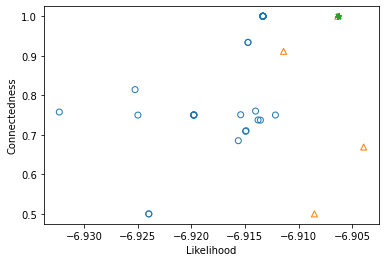

In [15]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

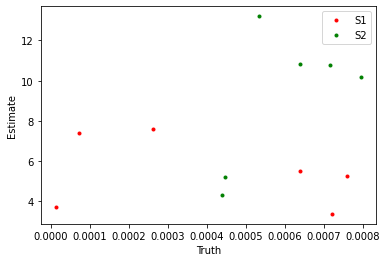

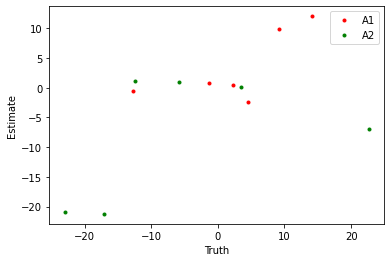

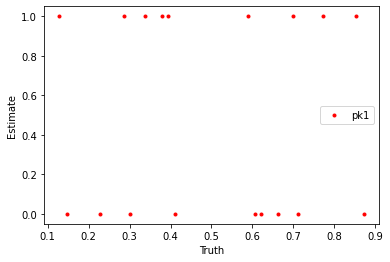

In [16]:
# Plot parameter truth vs. estimates
plt.plot(sim_params['S1'].flatten(), blm_fit.model.S1.flatten(), '.', label='S1', color='red')
plt.plot(sim_params['S2'].flatten(), blm_fit.model.S2.flatten(), '.', label='S2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(sim_params['A1'].flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(sim_params['A2'].flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(sim_params['pk1'].flatten(), blm_fit.model.pk1.flatten(), '.', label='pk1', color='red')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

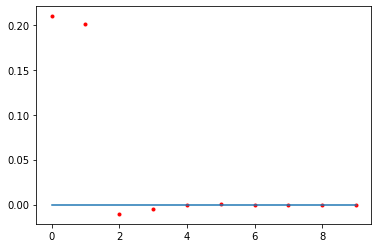

In [17]:
plt.plot(np.diff(blm_fit.model.liks1), '.', label='liks1', color='red')
plt.plot([0] * (len(blm_fit.model.liks1) - 1))

In [18]:
np.min(np.diff(blm_fit.model.liks1)) * np.max(np.diff(blm_fit.model.liks1)) > 0

False

In [19]:
blm_fit.model.liks1

array([-7.30102702, -7.09146422, -6.89098686, -6.90146327, -6.90625612,
       -6.90638578, -6.9063258 , -6.90632399, -6.90632539, -6.90632561,
       -6.90632564])